In [1]:
%load_ext autoreload
%autoreload 2

import awkward as ak
import numpy as np
from particle import Particle

from python.analysis import cross_section, Fitting, Tags, vector
from python.analysis import Plots, Master, SelectionTools
from rich import print

In [2]:
config = "work/2023/cex_analysis_2GeV_config.json"
args = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration(config))
print(vars(args))
cross_section.SetPlotStyle(True, dpi = 100)

{
    'mc_file': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/ROOTFiles/PDSPAnalyser/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_
v1_ntuple_v09_41_00_03.root',
    'data_file': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/ROOTFiles/PDSPAnalyser/PDSPProd4_data_2GeV_reco2_ntuple_v09_42_
03_01.root',
    'ntuple_type': 'PDSPAnalyser',
    'mc_beam_quality_fit': {
        'mu_x': -30.64933296795492,
        'mu_y': 422.3169215500528,
        'mu_z': 0.1059250445152803,
        'sigma_x': 4.397563500425448,
        'sigma_y': 3.767586484419336,
        'sigma_z': 0.1999284779311936,
        'mu_dir_x': -0.16371231996302327,
        'mu_dir_y': -0.16272523516437884,
        'mu_dir_z': 0.8754531459561035,
        'mu_err_x': 0.022966518863990294,
        'mu_err_y': 0.015228003766506053,
        'mu_err_z': 0.000834226291678249,
        'sigma_err_x': 0.020029441299053513,
        'sigma_err_y': 0.013302720437142182,
        'sigma_err_z': 0.0007010527171278086,
        'mu_dir_err_x': 0.0006915631741301451,
        'mu_dir_err_y': 0.001068705402913383,
        'mu_dir_err_z': 0.0006651870698590503
    },
    'data_beam_quality_fit': {
        'mu_x': -27.76857419133848,
        'mu_y': 424.6628055823738,
        'mu_z': 4.00799684495873,
        'sigma_x': 4.3348975668055685,
        'sigma_y': 4.7448463221515365,
        'sigma_z': 1.149425797433293,
        'mu_dir_x': -0.14359093226653474,
        'mu_dir_y': -0.19334509071952846,
        'mu_dir_z': 0.8634907774608025,
        'mu_err_x': 0.013427465777139418,
        'mu_err_y': 0.012931209573248698,
        'mu_err_z': 0.0031923209441996852,
        'sigma_err_x': 0.011336317544860287,
        'sigma_err_y': 0.01128324485680001,
        'sigma_err_z': 0.002910436992341441,
        'mu_dir_err_x': 0.0004213028678783807,
        'mu_dir_err_y': 0.0006937108574706536,
        'mu_dir_err_z': 0.000431517116186705
    },
    'mc_beam_scraper_fit': {
        '0': {'bins': [1500.0, 1700.0], 'mu': -20.498463150094196, 'sigma': 32.60281185771283},
        '1': {'bins': [1700.0, 1900.0], 'mu': -5.185852549549711, 'sigma': 37.091532648635344},
        '2': {'bins': [1900.0, 2100.0], 'mu': 12.46485620219921, 'sigma': 40.830867236868144},
        '3': {'bins': [2100.0, 2300.0], 'mu': 52.973019985581686, 'sigma': 35.94230889560537}
    },
    'norm': 2.78,
    'norm_area': True,
    'correction': 'response',
    'correction_params': 
'/home/sb16165/Documents/pi0-analysis/analysis/work/2023/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_0
0_03/shower_energy_correction/gaussian.json',
    'beam_selection': {
        'selections': {
            'PiBeamSelection': <function PiBeamSelection at 0x7f79c5800e50>,
            'CaloSizeCut': <function CaloSizeCut at 0x7f79c58025f0>,
            'PandoraTagCut': <function PandoraTagCut at 0x7f79c5802560>,
            'DxyCut': <function DxyCut at 0x7f79c58027a0>,
            'DzCut': <function DzCut at 0x7f79c5802830>,
            'CosThetaCut': <function CosThetaCut at 0x7f79c58028c0>,
            'APA3Cut': <function APA3Cut at 0x7f79c5802950>,
            'MichelScoreCut': <function MichelScoreCut at 0x7f79c58029e0>,
            'MedianDEdXCut': <function MedianDEdXCut at 0x7f79c5802a70>,
            'BeamScraperCut': <function BeamScraperCut at 0x7f79c5802b00>
        },
        'mc_arguments': {
            'PiBeamSelection': {'use_beam_inst': False},
            'CaloSizeCut': {},
            'PandoraTagCut': {'cut': 13},
            'DxyCut': {
                'cut': 3,
                'fits': {
                    'mu_x': -30.64933296795492,
                    'mu_y': 422.3169215500528,
                    'mu_z': 0.1059250445152803,
                    'sigma_x': 4.397563500425448,
                    'sigma_y': 3.767586484419336,
                    'sigma_z': 0.1999284779311936,
                    'mu_dir_x': -0.16371231996302327,
                    'mu_dir_y': -0.16272523516437884,
                    'mu_dir_z': 

In [3]:
mc = Master.Data(args.mc_file, -1, nTuple_type = Master.Ntuple_Type(args.ntuple_type)) # 149097

In [4]:
beam_mask = SelectionTools.CombineSelections(mc, args.beam_selection["selections"].values(), 0, args.beam_selection["mc_arguments"].values())

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


In [5]:
def UpstreamLoss(events : Master.Data, beam_mask : ak.Array, bins):
    params, params_err = cross_section.UpstreamLossFit(bins, cross_section.KE(events.recoParticles.beam_inst_P[beam_mask], Particle.from_pdgid(211).mass), events.trueParticles.beam_KE_front_face[beam_mask], Fitting.gaussian, Fitting.poly2d)
    reco_delta_E_upstream = cross_section.UpstreamEnergyLoss(cross_section.KE(events.recoParticles.beam_inst_P, Particle.from_pdgid(211).mass), params, Fitting.poly2d)
    return reco_delta_E_upstream

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in power
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(


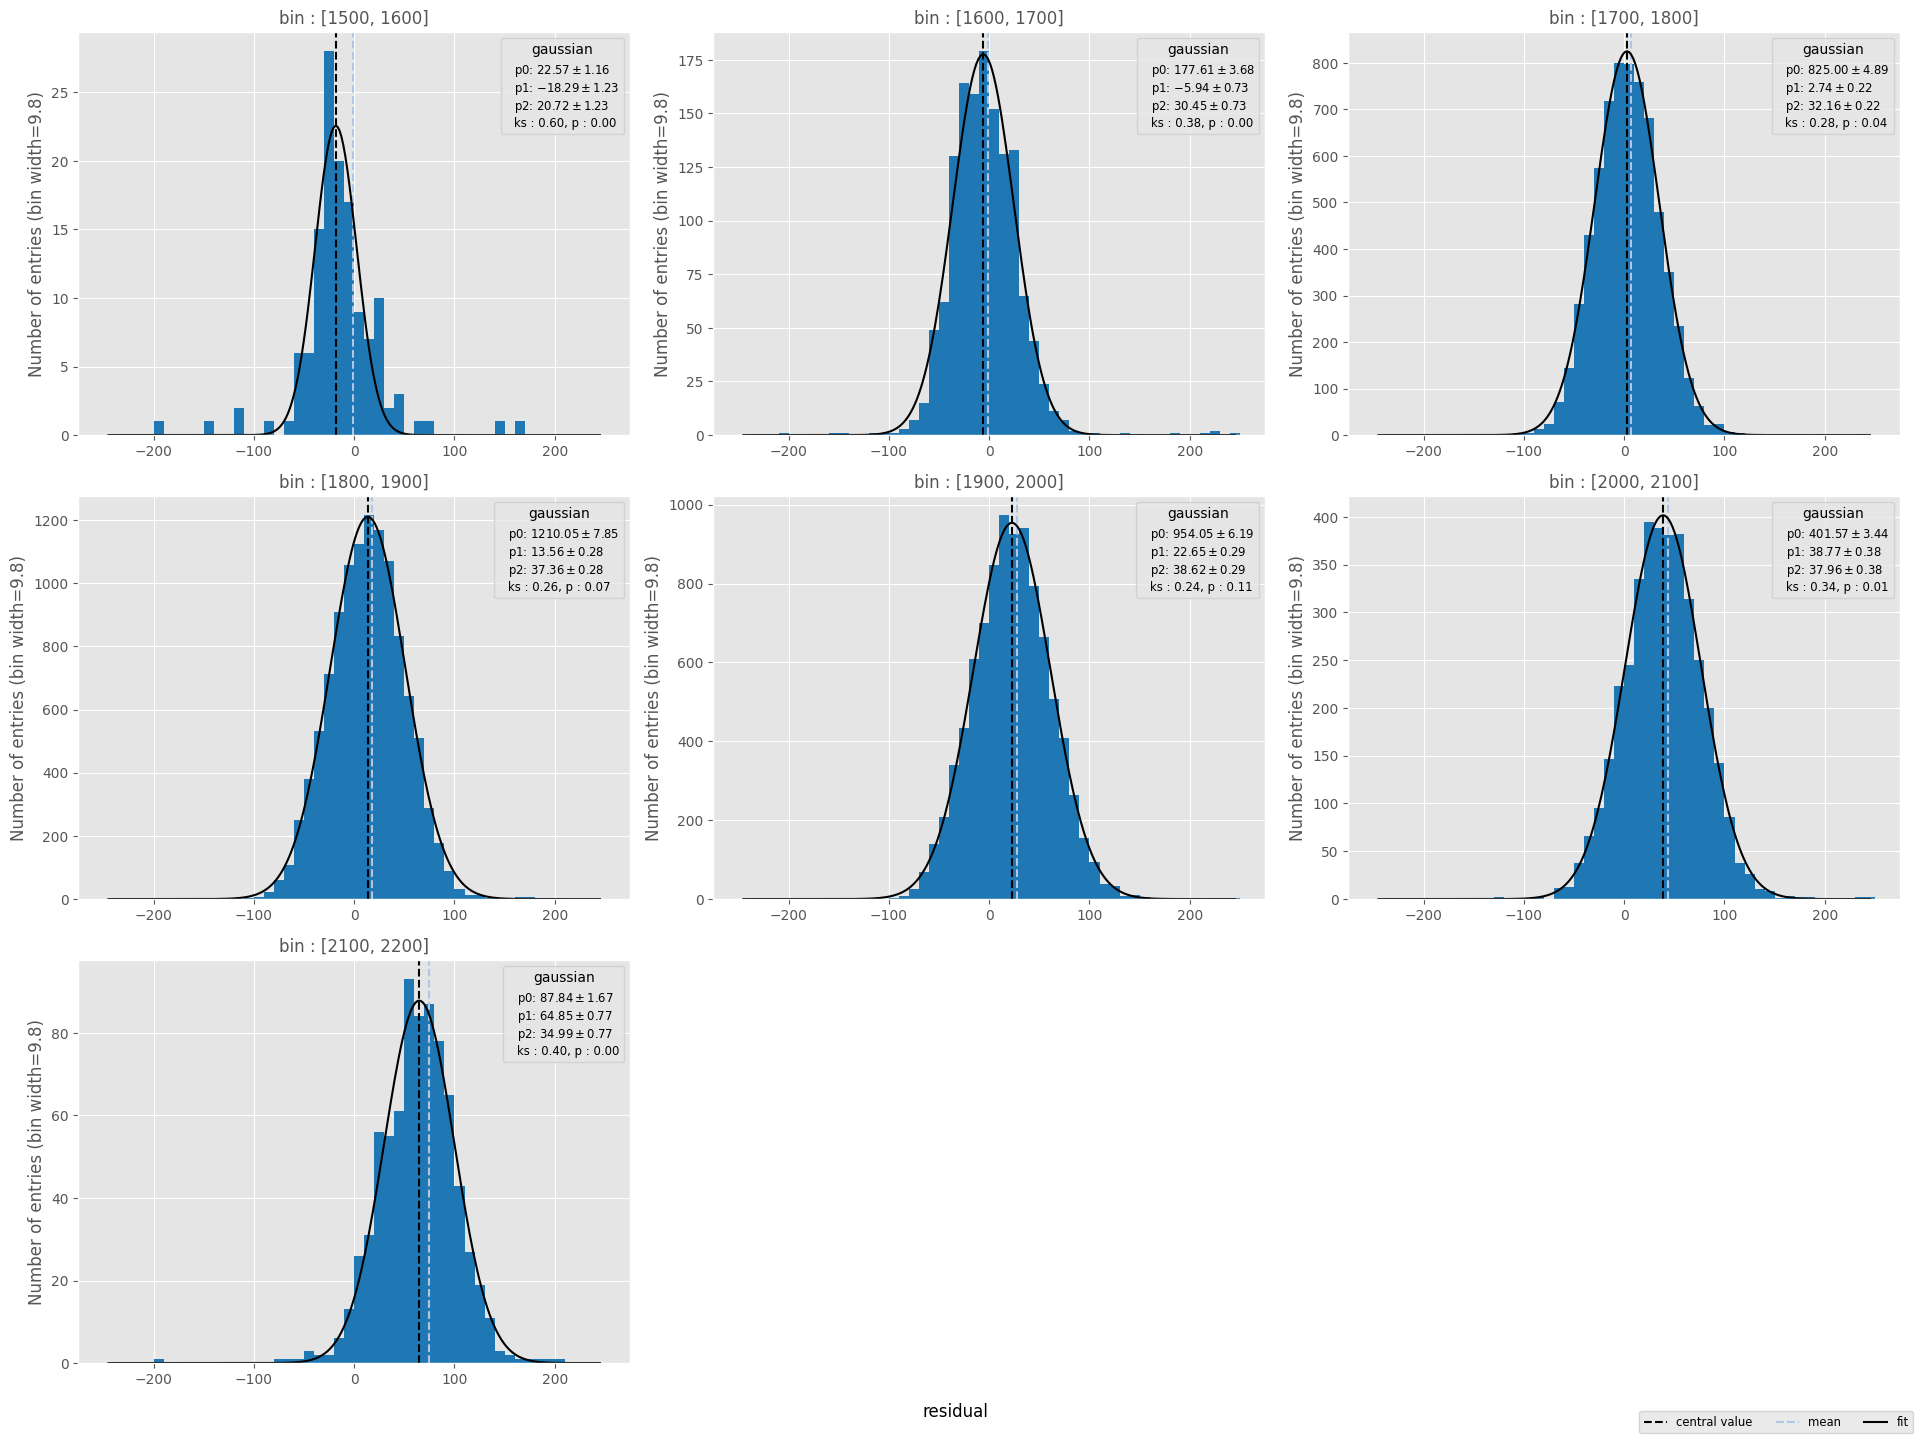

In [6]:
#bins = ak.Array([700, 750, 800, 850, 900, 950, 1000, 1050, 1100])
bins = ak.Array([1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200])
reco_KE_ff = cross_section.KE(mc.recoParticles.beam_inst_P, Particle.from_pdgid(211).mass) - UpstreamLoss(mc, beam_mask, bins)
reco_KE_int = reco_KE_ff - cross_section.RecoDepositedEnergy(mc, reco_KE_ff, "bb")
reco_track_length = ak.sum(vector.dist(mc.recoParticles.beam_calo_pos[:, 1:], mc.recoParticles.beam_calo_pos[:, :-1]), -1)

no selection

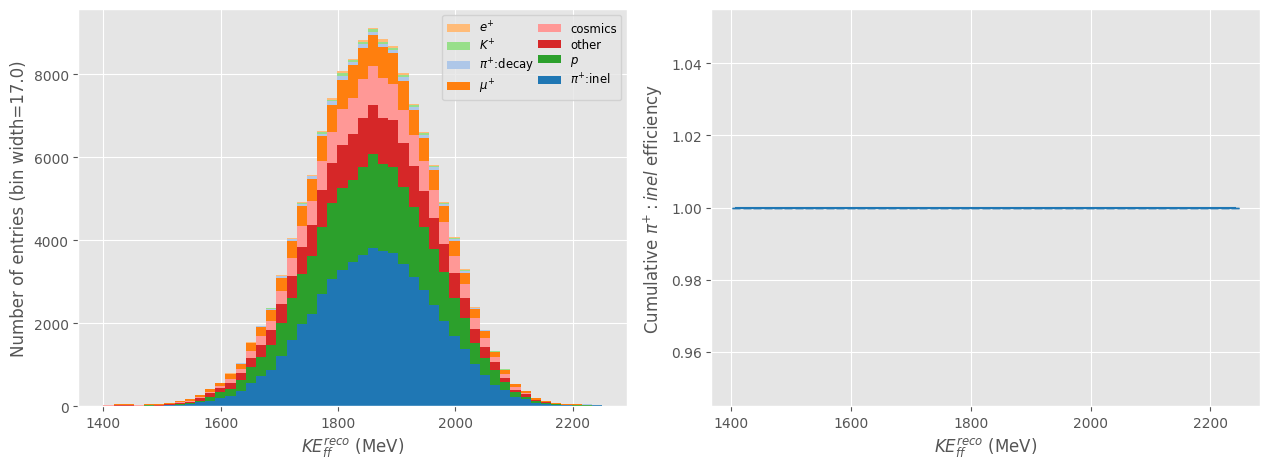

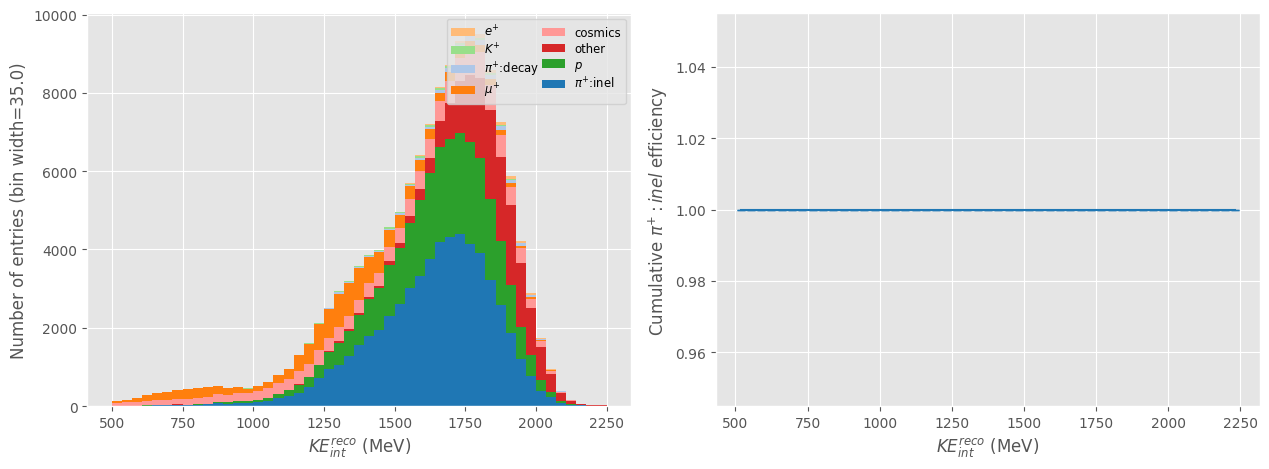

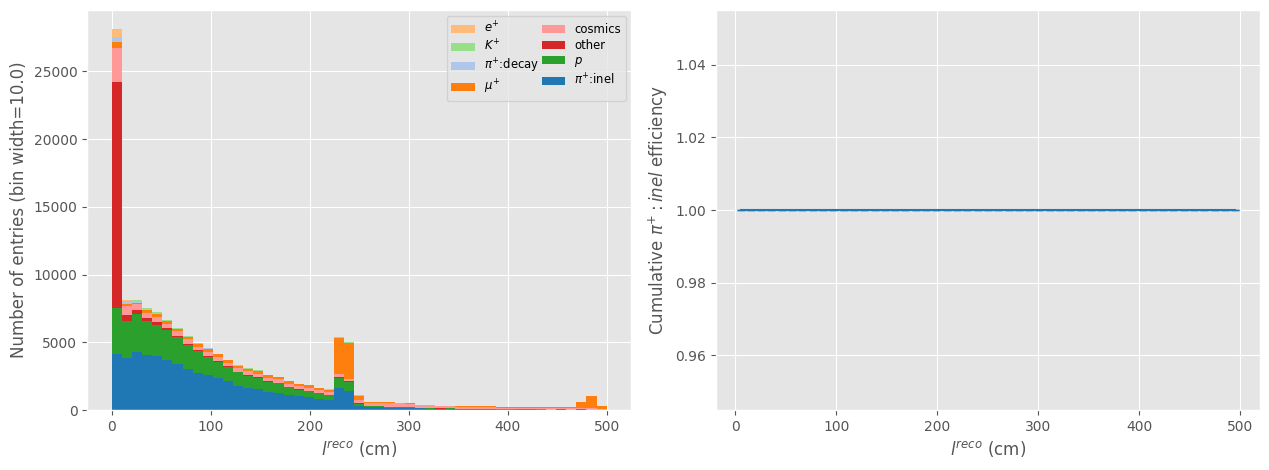

PiBeamSelection <function PiBeamSelection at 0x7f79c5800e50>
{'use_beam_inst': False}

141548 102443

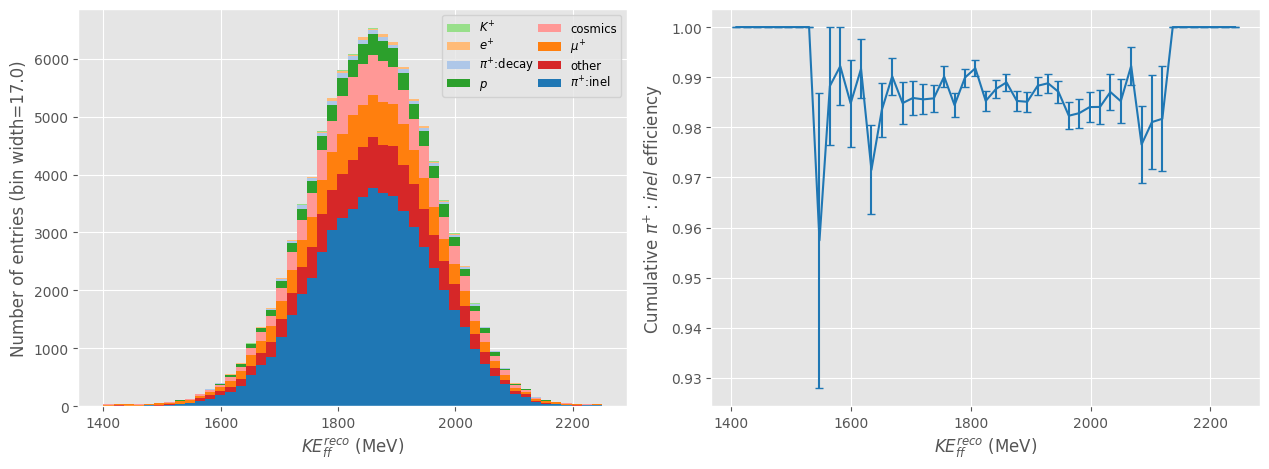

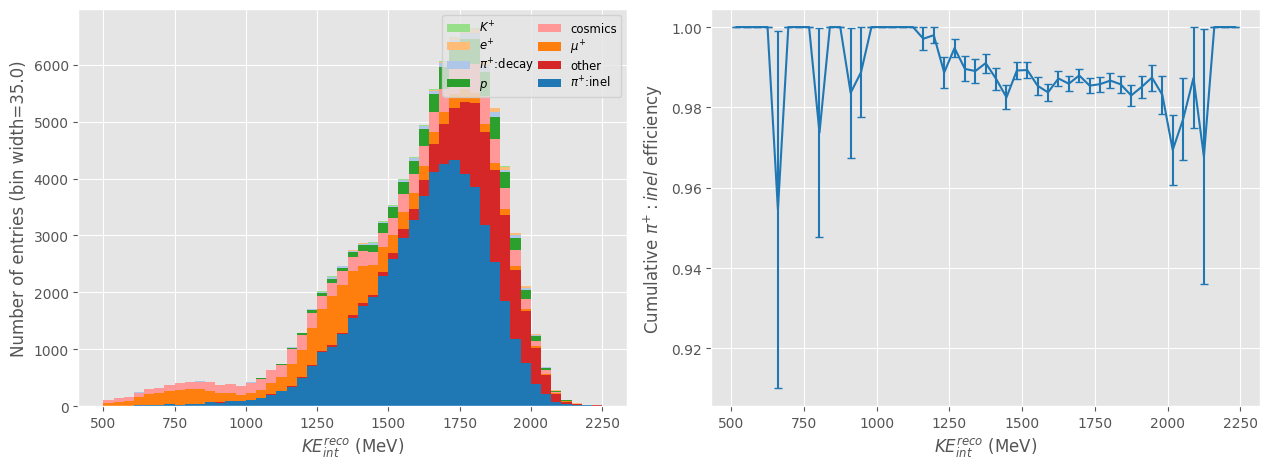

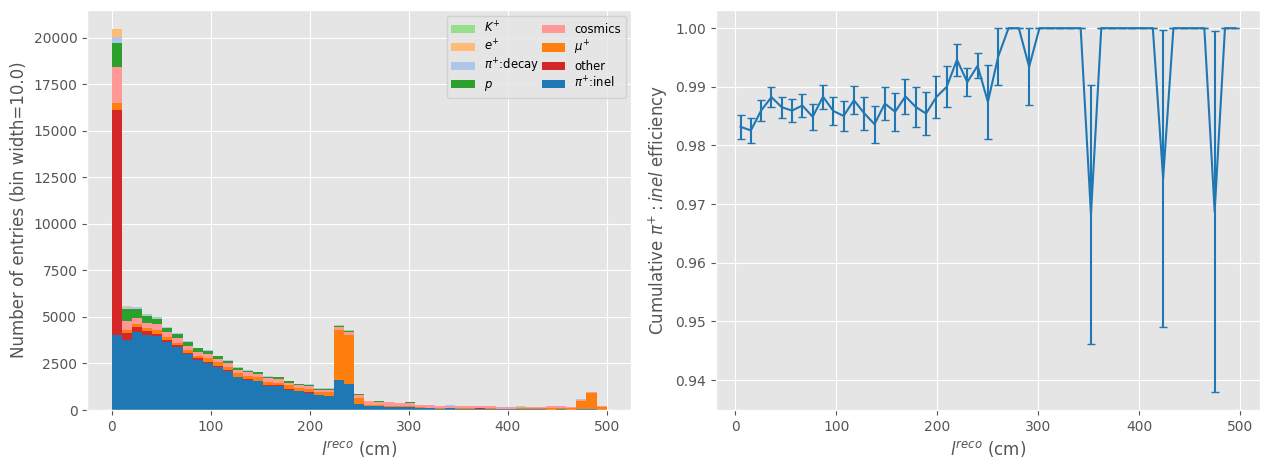

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


CaloSizeCut <function CaloSizeCut at 0x7f79c58025f0>
{}

102443 91248

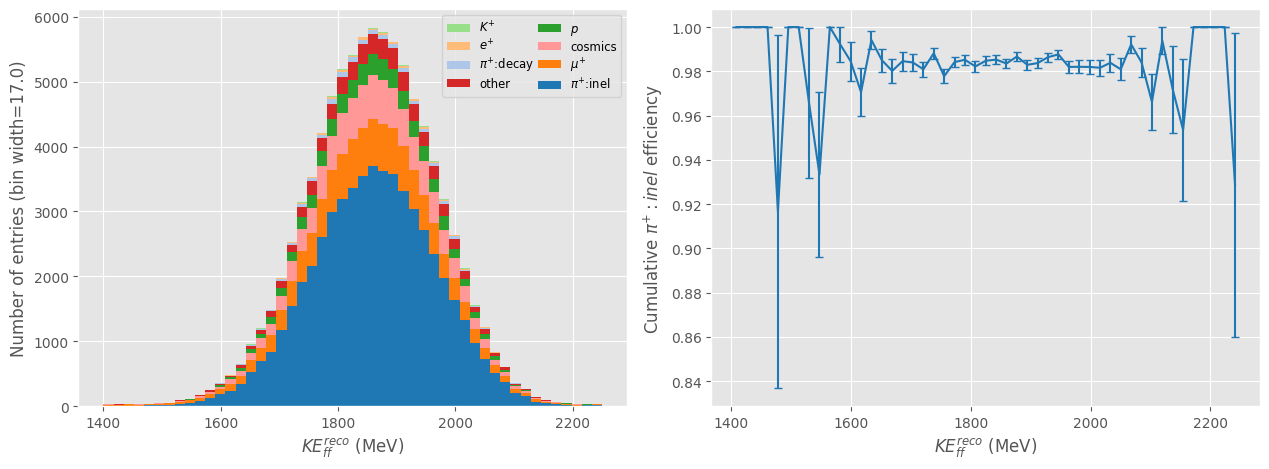

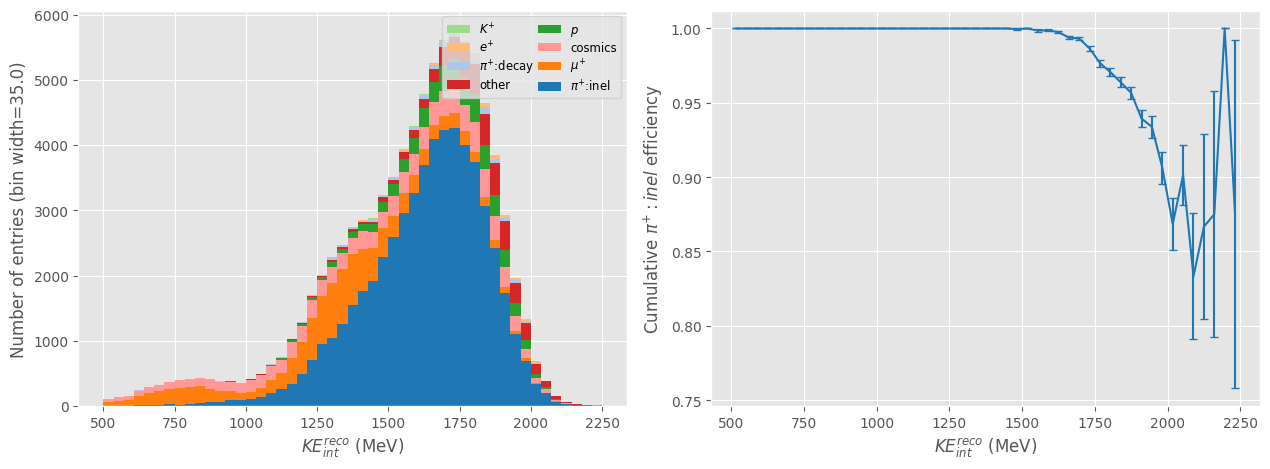

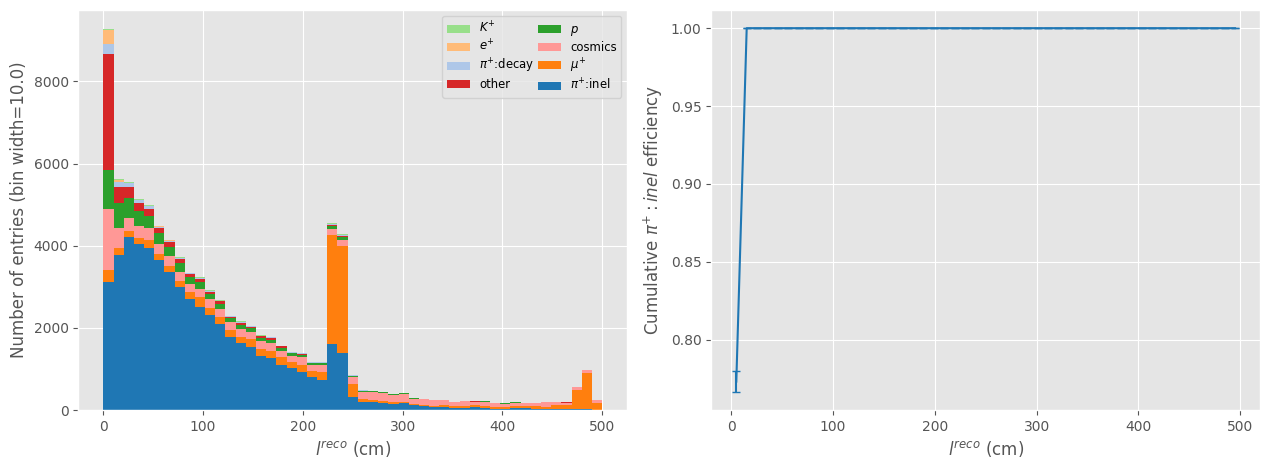

PandoraTagCut <function PandoraTagCut at 0x7f79c5802560>
{'cut': 13}

91248 87403

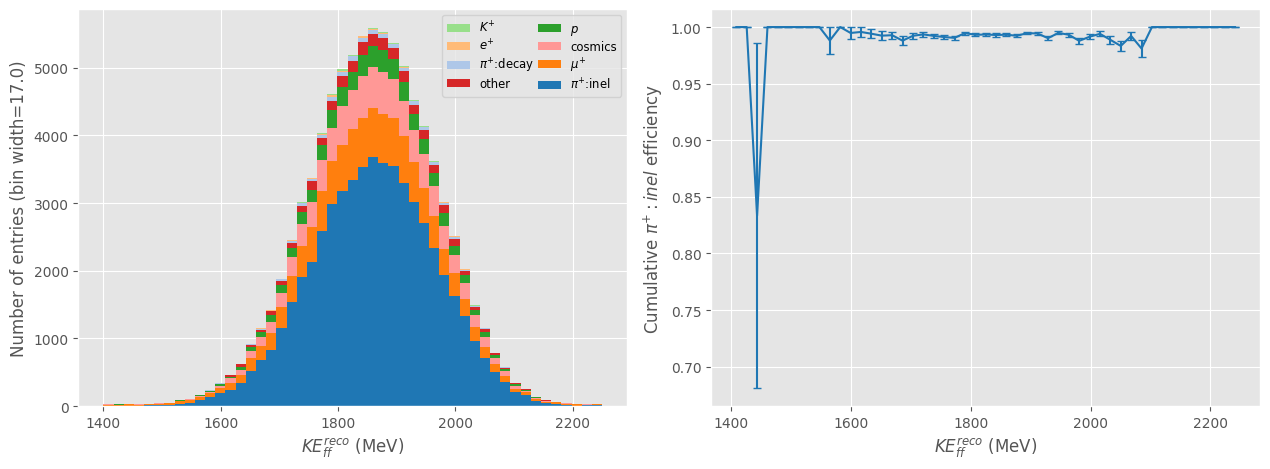

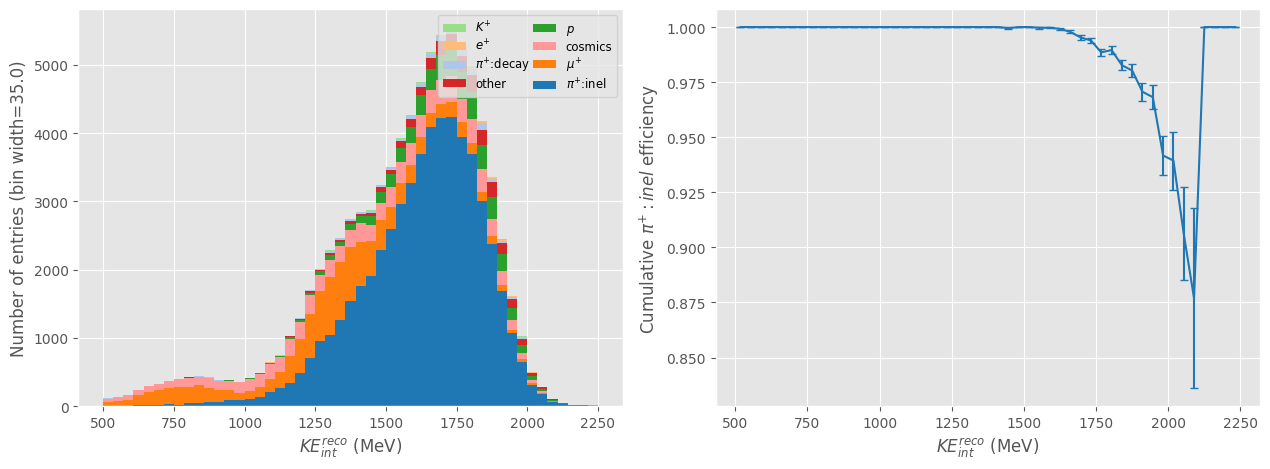

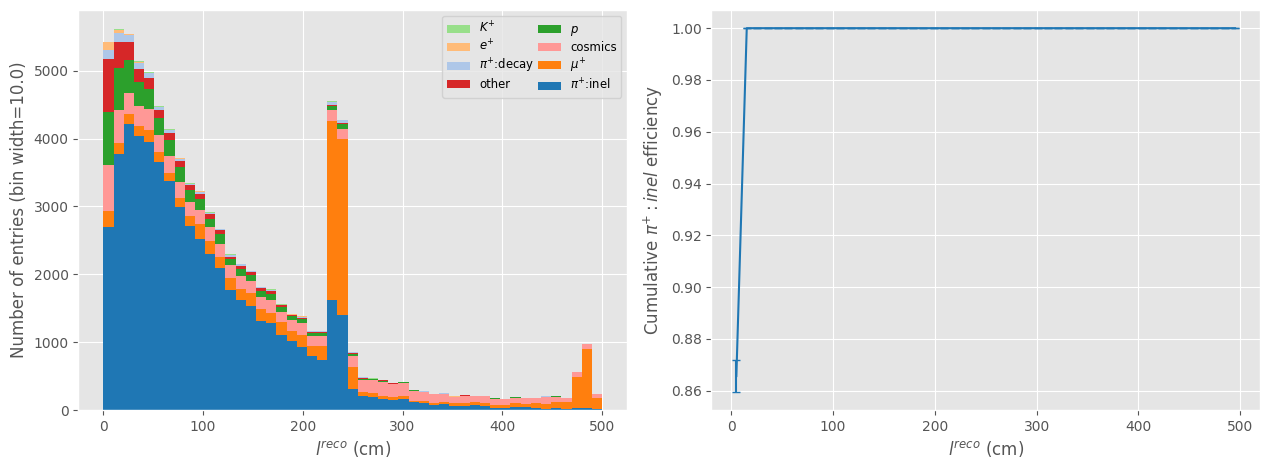

DxyCut <function DxyCut at 0x7f79c58027a0>
{
    'cut': 3,
    'fits': {
        'mu_x': -30.64933296795492,
        'mu_y': 422.3169215500528,
        'mu_z': 0.1059250445152803,
        'sigma_x': 4.397563500425448,
        'sigma_y': 3.767586484419336,
        'sigma_z': 0.1999284779311936,
        'mu_dir_x': -0.16371231996302327,
        'mu_dir_y': -0.16272523516437884,
        'mu_dir_z': 0.8754531459561035,
        'mu_err_x': 0.022966518863990294,
        'mu_err_y': 0.015228003766506053,
        'mu_err_z': 0.000834226291678249,
        'sigma_err_x': 0.020029441299053513,
        'sigma_err_y': 0.013302720437142182,
        'sigma_err_z': 0.0007010527171278086,
        'mu_dir_err_x': 0.0006915631741301451,
        'mu_dir_err_y': 0.001068705402913383,
        'mu_dir_err_z': 0.0006651870698590503
    }
}

87403 68150

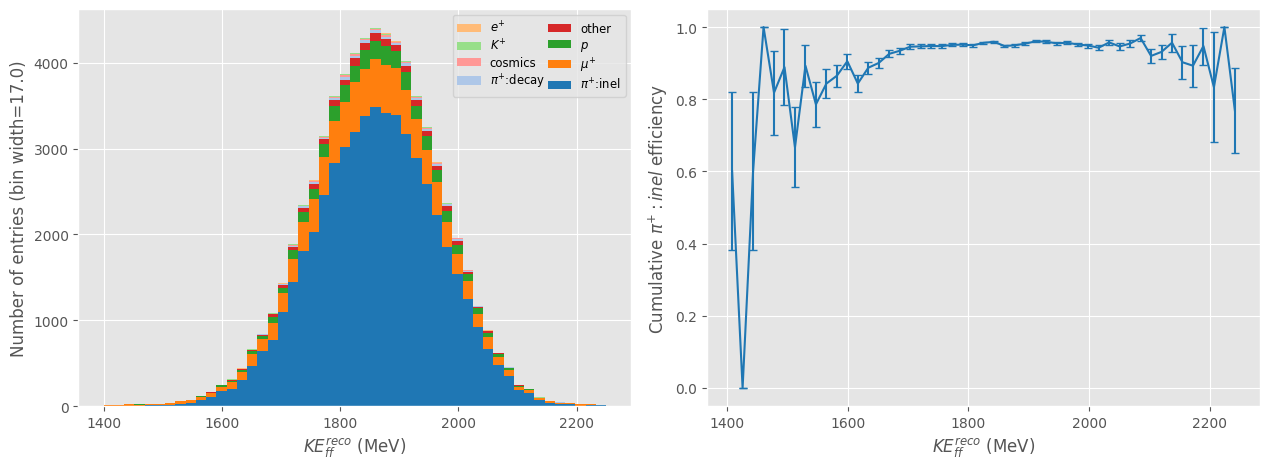

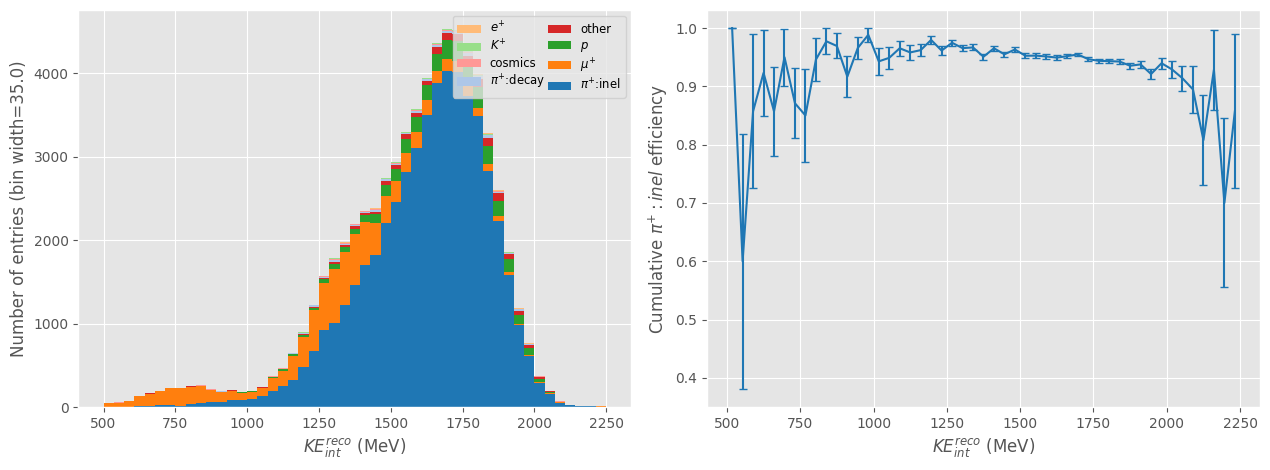

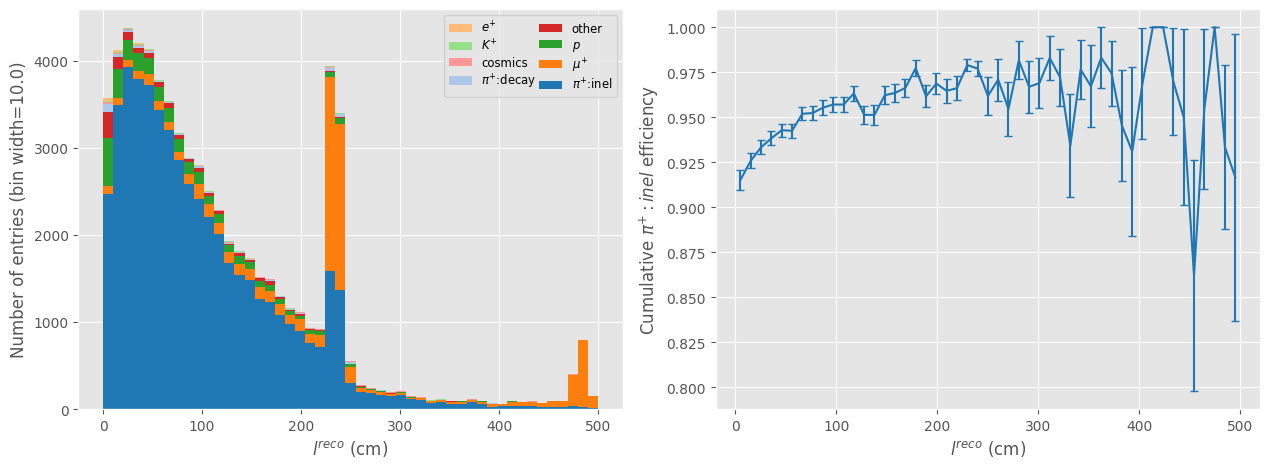

DzCut <function DzCut at 0x7f79c5802830>
{
    'cut': [-3, 3],
    'fits': {
        'mu_x': -30.64933296795492,
        'mu_y': 422.3169215500528,
        'mu_z': 0.1059250445152803,
        'sigma_x': 4.397563500425448,
        'sigma_y': 3.767586484419336,
        'sigma_z': 0.1999284779311936,
        'mu_dir_x': -0.16371231996302327,
        'mu_dir_y': -0.16272523516437884,
        'mu_dir_z': 0.8754531459561035,
        'mu_err_x': 0.022966518863990294,
        'mu_err_y': 0.015228003766506053,
        'mu_err_z': 0.000834226291678249,
        'sigma_err_x': 0.020029441299053513,
        'sigma_err_y': 0.013302720437142182,
        'sigma_err_z': 0.0007010527171278086,
        'mu_dir_err_x': 0.0006915631741301451,
        'mu_dir_err_y': 0.001068705402913383,
        'mu_dir_err_z': 0.0006651870698590503
    }
}

68150 62438

/tmp/ipykernel_5517/1161467621.py:2: RuntimeWarning: invalid value encountered in divide
  p = selected_count / total_count
/tmp/ipykernel_5517/1161467621.py:4: RuntimeWarning: invalid value encountered in divide
  error = (p * (1 - p) / total_count)**0.5


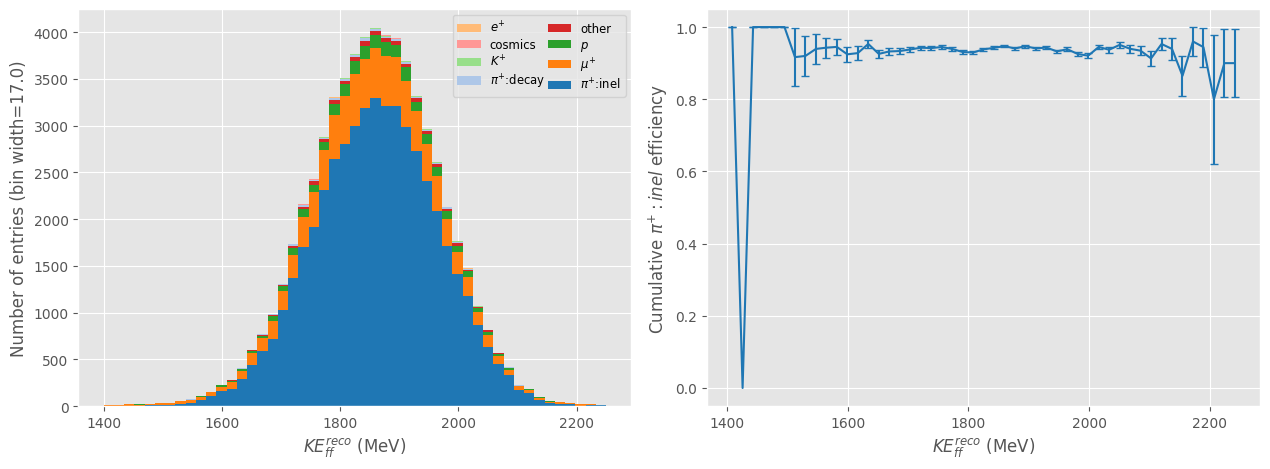

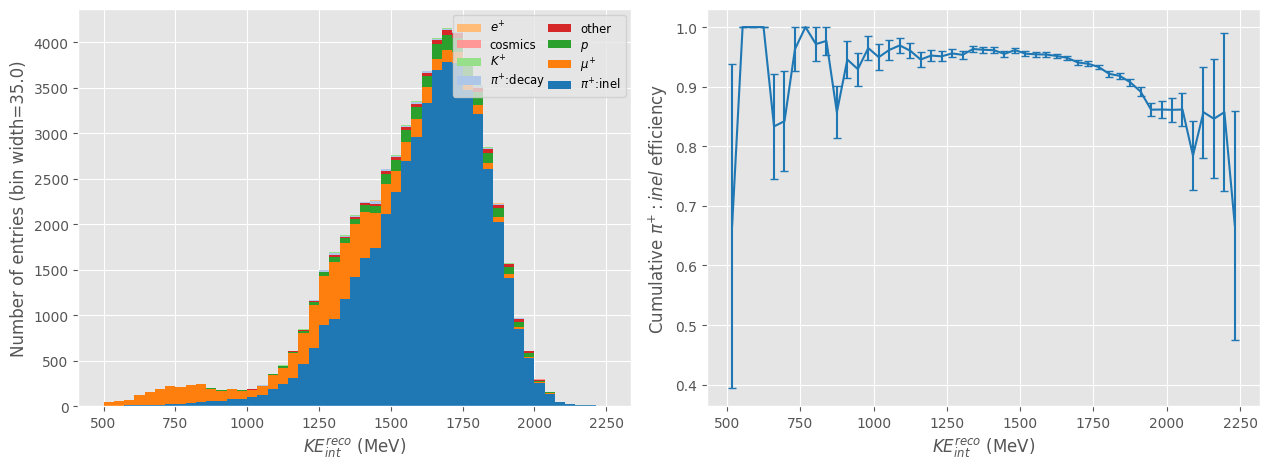

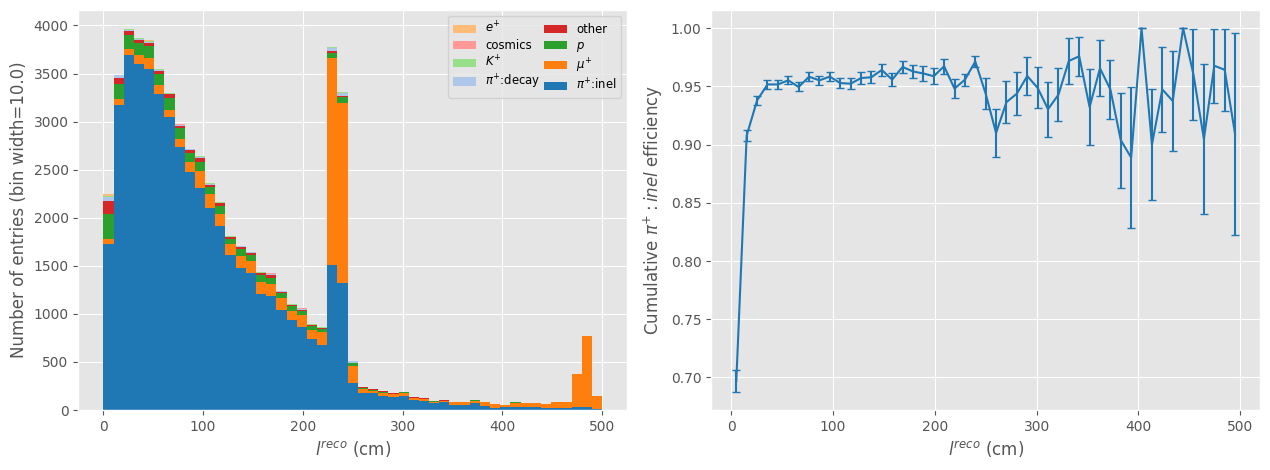

CosThetaCut <function CosThetaCut at 0x7f79c58028c0>
{
    'cut': 0.95,
    'fits': {
        'mu_x': -30.64933296795492,
        'mu_y': 422.3169215500528,
        'mu_z': 0.1059250445152803,
        'sigma_x': 4.397563500425448,
        'sigma_y': 3.767586484419336,
        'sigma_z': 0.1999284779311936,
        'mu_dir_x': -0.16371231996302327,
        'mu_dir_y': -0.16272523516437884,
        'mu_dir_z': 0.8754531459561035,
        'mu_err_x': 0.022966518863990294,
        'mu_err_y': 0.015228003766506053,
        'mu_err_z': 0.000834226291678249,
        'sigma_err_x': 0.020029441299053513,
        'sigma_err_y': 0.013302720437142182,
        'sigma_err_z': 0.0007010527171278086,
        'mu_dir_err_x': 0.0006915631741301451,
        'mu_dir_err_y': 0.001068705402913383,
        'mu_dir_err_z': 0.0006651870698590503
    }
}

62438 59985

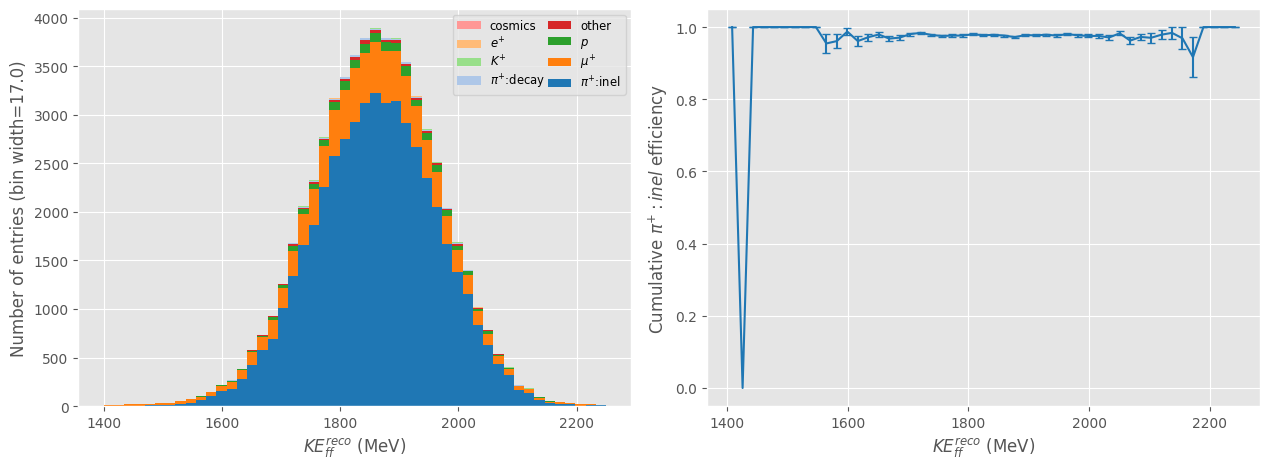

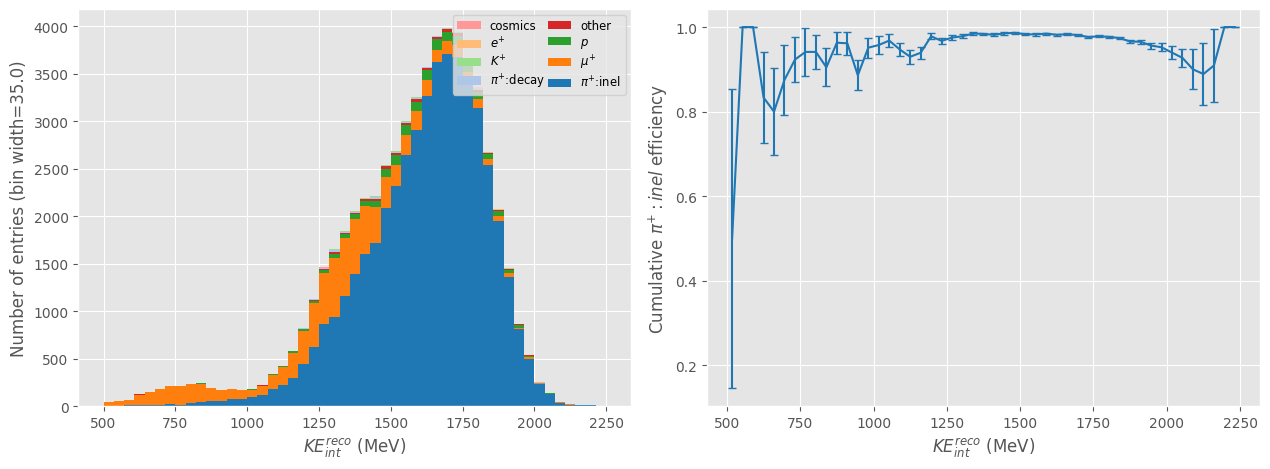

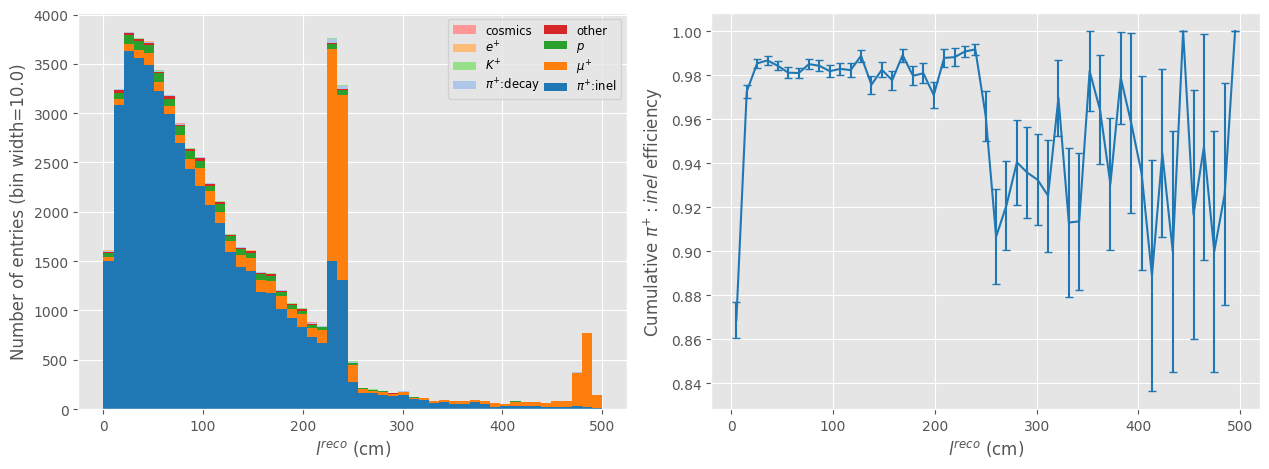

APA3Cut <function APA3Cut at 0x7f79c5802950>
{'cut': 220}

59985 48795

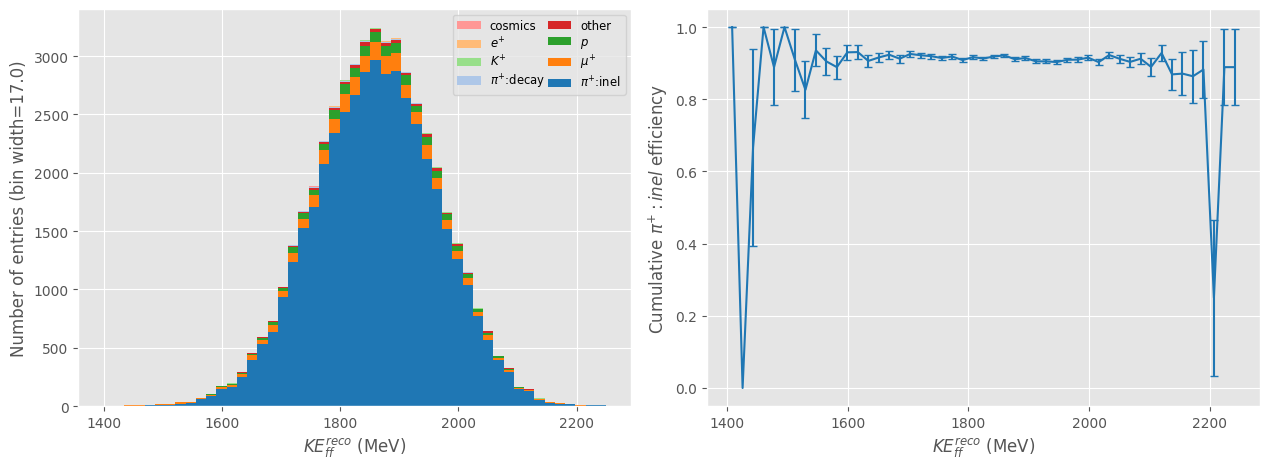

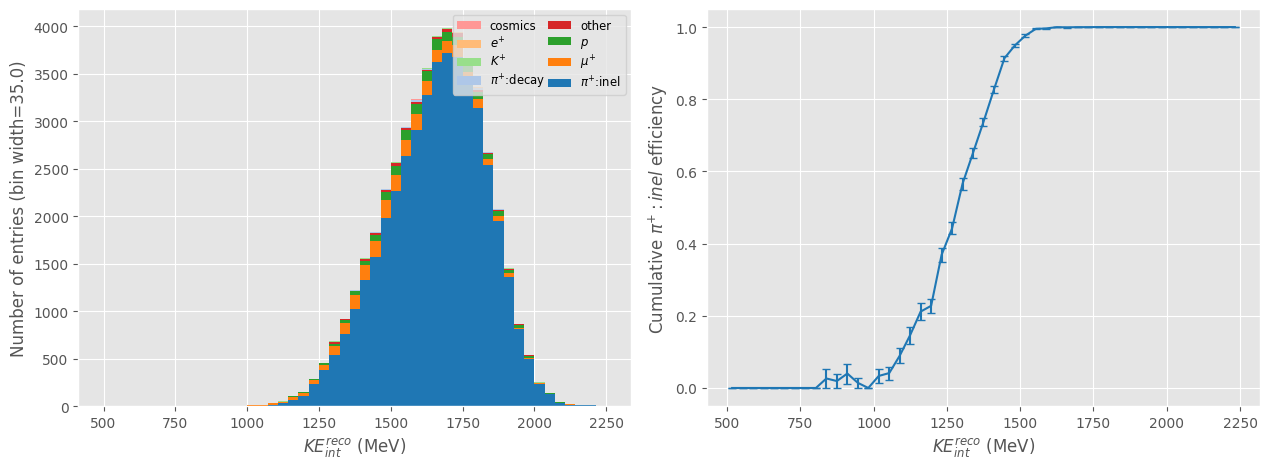

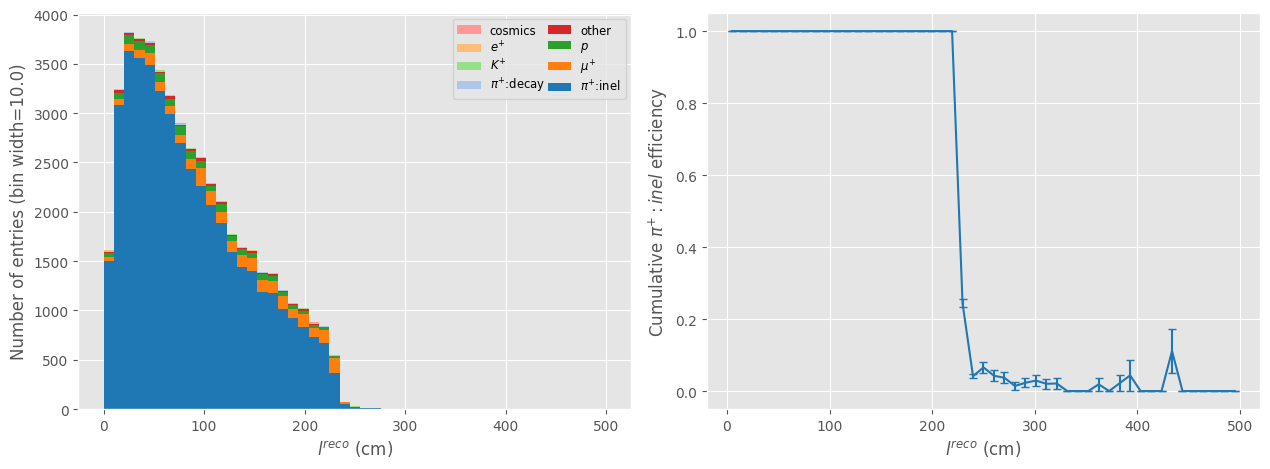

MichelScoreCut <function MichelScoreCut at 0x7f79c58029e0>
{'cut': 0.55}

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


48795 48575

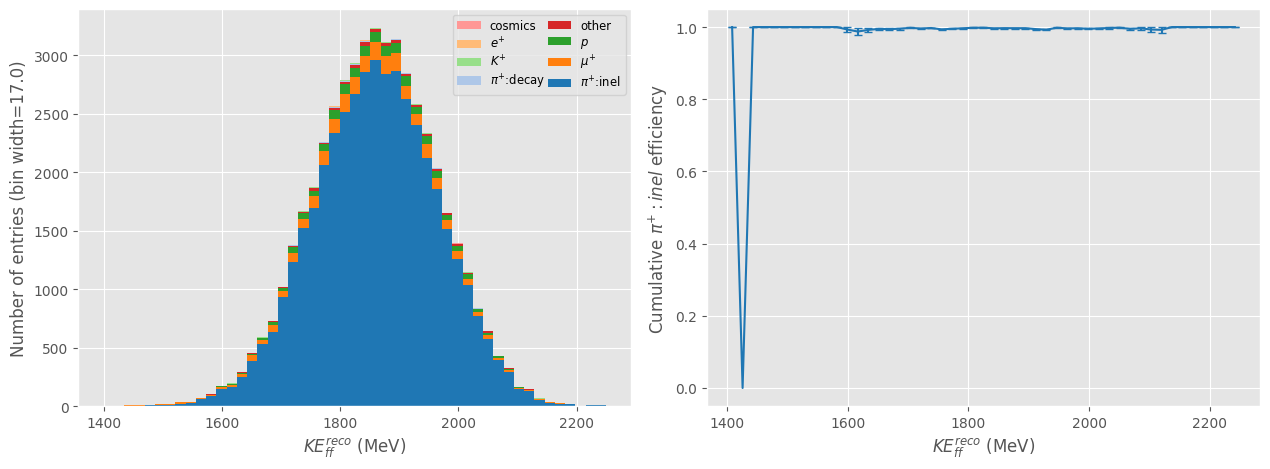

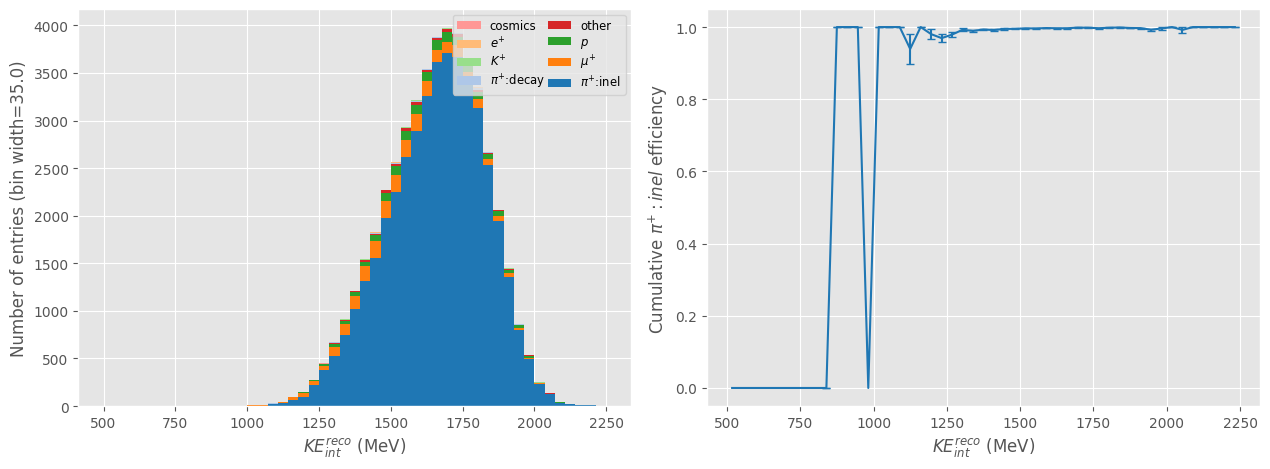

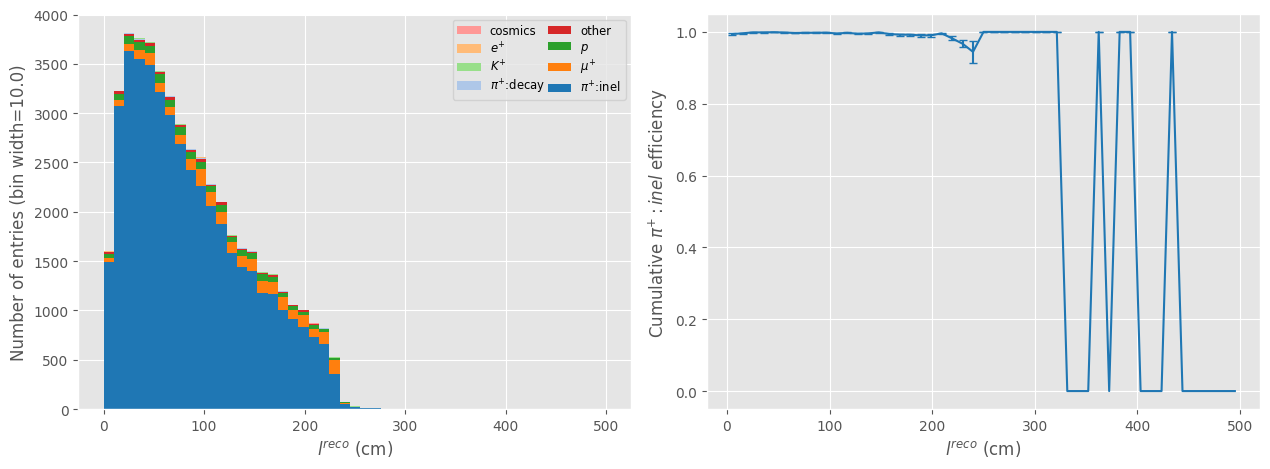

MedianDEdXCut <function MedianDEdXCut at 0x7f79c5802a70>
{'cut': 2.4}

48575 46726

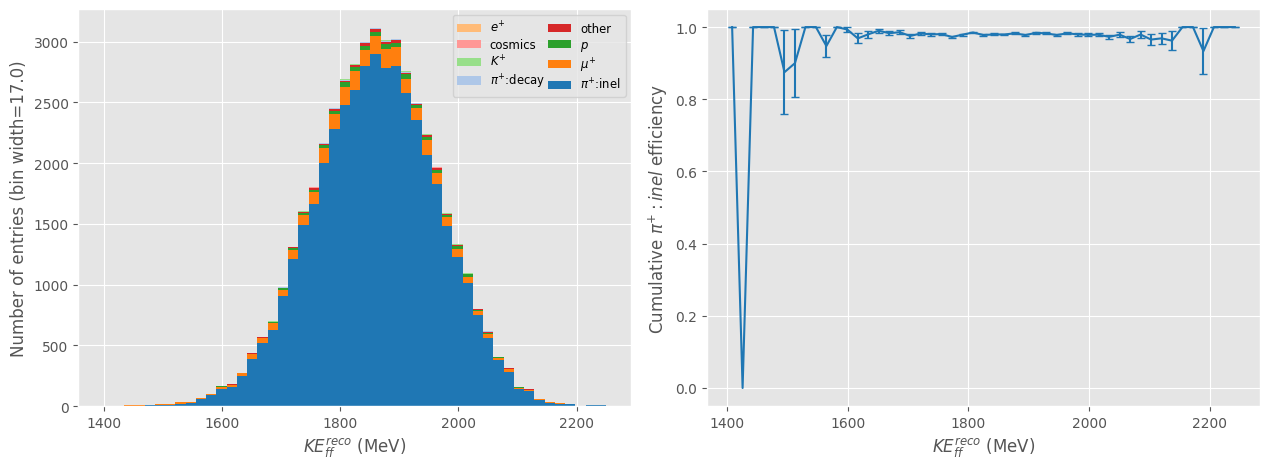

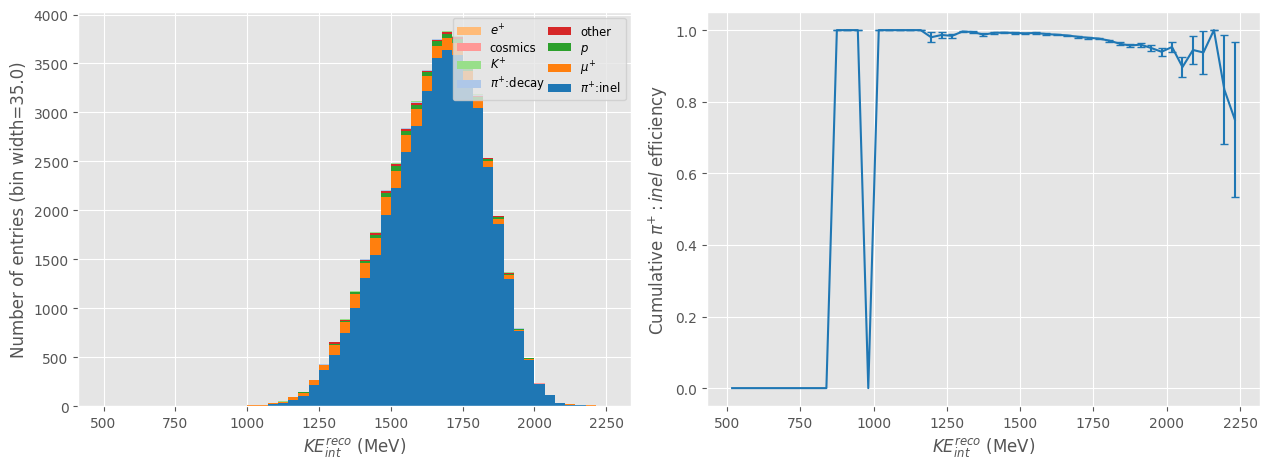

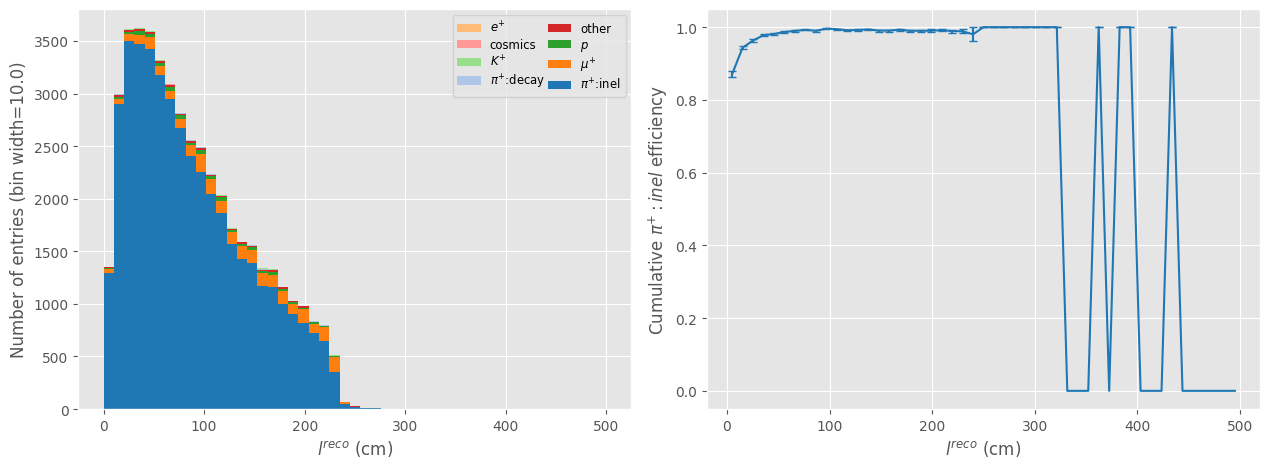

BeamScraperCut <function BeamScraperCut at 0x7f79c5802b00>
{
    'pdg_hyp': 211,
    'KE_range': 1,
    'cut': 1.5,
    'fits': {
        '0': {'bins': [1500.0, 1700.0], 'mu': -20.498463150094196, 'sigma': 32.60281185771283},
        '1': {'bins': [1700.0, 1900.0], 'mu': -5.185852549549711, 'sigma': 37.091532648635344},
        '2': {'bins': [1900.0, 2100.0], 'mu': 12.46485620219921, 'sigma': 40.830867236868144},
        '3': {'bins': [2100.0, 2300.0], 'mu': 52.973019985581686, 'sigma': 35.94230889560537}
    }
}

46726 30016

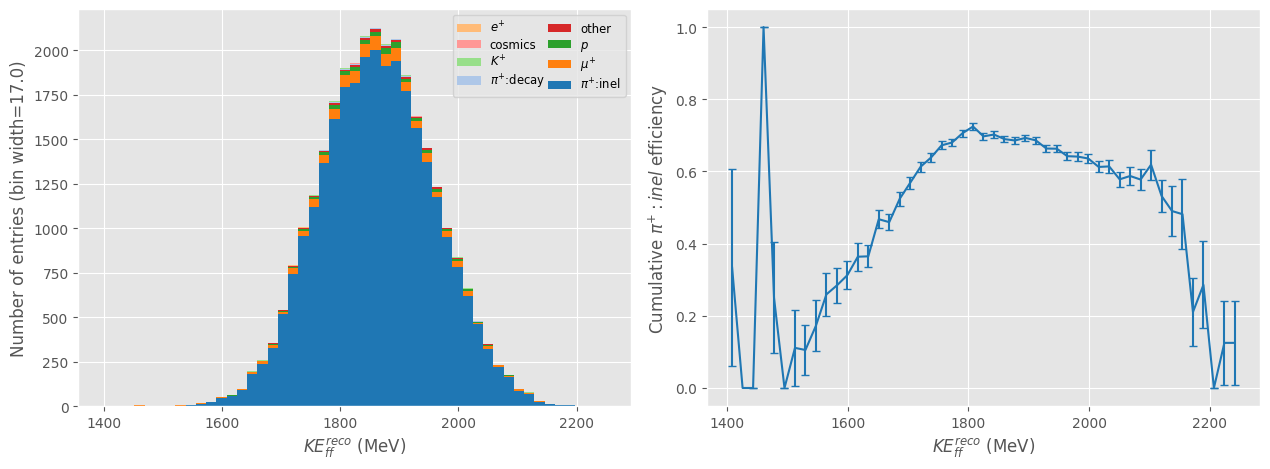

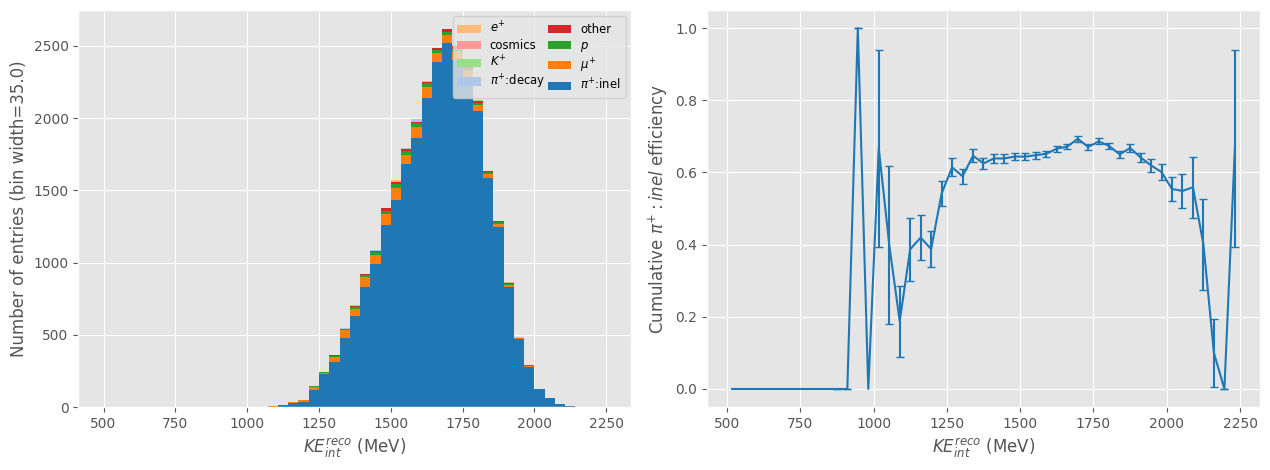

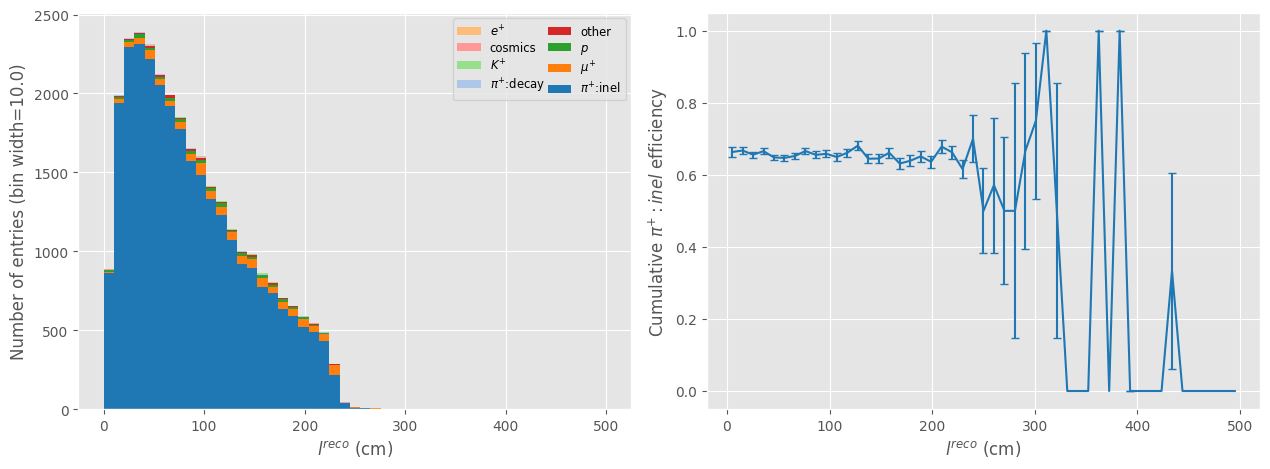

In [7]:
def Efficiency(selected_count : np.array, total_count : np.array) -> tuple[np.array, np.array]:
    p = selected_count / total_count
    p = np.nan_to_num(p)
    error = (p * (1 - p) / total_count)**0.5
    return p, error


def plot_params(params : ak.Array, mask : ak.Array, initial_pions : ak.Array, tags : Tags.Tags, x_range : list, x_label : str):
    dims = Plots.FigureDimensions(2)
    Plots.plt.subplots(1, 2, figsize = [6.4 * dims[1], 4.8 * dims[0]])

    bins = np.linspace(min(x_range), max(x_range), 50)

    efficiency_initial = Efficiency(np.histogram(np.array(params[mask][tags["$\\pi^{+}$:inel"].mask]), bins, range = x_range)[0], np.histogram(np.array(params[initial_pions]), bins, range = x_range)[0])
    Plots.plt.subplot(121)
    Plots.PlotTagged(params[mask], tags, bins = bins, x_range = x_range, x_label = x_label, newFigure = False)
    Plots.plt.subplot(122)
    Plots.Plot((bins[1:] + bins[:-1])/2, efficiency_initial[0], yerr = efficiency_initial[1], xlabel = x_label, ylabel = "Cumulative $\pi^{+}:inel$ efficiency", newFigure = False)


def plot_all_params(mask):
    particle_tags = Tags.GenerateTrueBeamParticleTags(mc)
    initial_inelastic = ak.Array(particle_tags["$\\pi^{+}$:inel"].mask)
    for p in particle_tags:
        particle_tags[p].mask = particle_tags[p].mask[mask]

    plot_params(reco_KE_ff, mask, initial_inelastic, particle_tags, [1400, 2250], "$KE^{reco}_{ff}$ (MeV)")
    plot_params(reco_KE_int, mask, initial_inelastic, particle_tags, [500, 2250], "$KE^{reco}_{int}$ (MeV)")
    plot_params(reco_track_length, mask, initial_inelastic, particle_tags, [0, 500], "$l^{reco}$ (cm)")
    Plots.plt.show()


energy_slices = cross_section.Slices(50, 1000, 2050, True)

print("no selection")
plot_all_params(mc.eventNum > 0)

mask = None
for a in args.beam_selection["selections"]:
    print(a, args.beam_selection["selections"][a], args.beam_selection["mc_arguments"][a])
    mask = args.beam_selection["selections"][a](mc, **args.beam_selection["mc_arguments"][a])
    # tmp = args.beam_selection["selections"][a](mc, **args.beam_selection["mc_arguments"][a])
    # if mask is None:
    #     mask = tmp
    # else:
    #     mask = mask & tmp
    print(ak.count(mask), ak.sum(mask))

    plot_all_params(mask)
    mc.Filter([mask], [mask])
    reco_KE_ff = reco_KE_ff[mask]
    reco_KE_int = reco_KE_int[mask]
    reco_track_length = reco_track_length[mask]


In [8]:
mc.Filter([beam_mask], [beam_mask])
reco_KE_ff = reco_KE_ff[beam_mask]
reco_KE_int = reco_KE_int[beam_mask]
reco_track_length = reco_track_length[beam_mask]

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleData__pdg.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleData__number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleData__beam_traj_KE.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _TrueParticleData__beam_traj_pos.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/D

ValueError: Mask signature (141548 events, -1 PFOs) does not match the required signature of (46726 events, -1 PFOs) for a simultaenous mask, or (30016 events, -1 PFOs) for a consequtive mask.

In [9]:
def CreatePFOMasks(mc : Master.Data, selections : dict, extra_args : dict = None):
    mask = None
    for c, v in zip(selections["selections"].values(), selections["mc_arguments"].values()):
        if extra_args is not None:
            v = {**v, **extra_args}
        tmp = c(mc, **v)
        if mask is None:
            mask = tmp
        else:
            mask = mask & tmp
    return mask

if args.valid_pfo_selection:
    mc.Filter([cross_section.PFOSelection.GoodShowerSelection(mc)])

photons = CreatePFOMasks(mc, args.photon_selection)
piplus = CreatePFOMasks(mc, args.piplus_selection)
pi0s = CreatePFOMasks(mc, args.pi0_selection, {"photon_mask" : photons})

[50, 250]


In [10]:
def FitlerTags(tags, mask):
    for r in tags:
        tags[r].mask = tags[r].mask & mask
    return tags

def UpdateTags(tags, mask):
    for r in tags:
        tags[r].mask = tags[r].mask[mask]
    return tags

regions = cross_section.EventSelection.create_regions(ak.sum(pi0s, axis = -1), ak.sum(piplus, axis = -1)) # plot varaibles stacked in regions
# regions.pop("pion_prod_>1_pi0")

In [11]:
def PlotInRegions(param, regions, bins, x_range, x_label, stacked : bool = True, norm : bool = True):
    for _, r in Plots.IterMultiPlot(regions, sharex = True, sharey = True):
        tags = UpdateTags(cross_section.EventSelection.GenerateTrueFinalStateTags(mc), regions[r])
        if stacked is True:
            histtype = "bar"
        else:
            histtype = "step"
        Plots.PlotTagged(param[regions[r]], tags, title = r, newFigure = False, stacked = stacked, bins = bins, histtype = histtype, x_label = x_label, x_range = x_range, norm = norm, ncols = 1)

def PlotTaggedNormalisedError(param, regions, bins, range, label):
    for _, r in Plots.IterMultiPlot(regions):
        tags = UpdateTags(cross_section.EventSelection.GenerateTrueFinalStateTags(mc), regions[r])

        for tag in tags.values():
            counts, edges = np.histogram(np.array(param[regions[r]][tag.mask]), bins = bins, range = range, density = False)
            centers = (edges[1:] + edges[:-1])/2

            density = counts / (sum(counts) * np.diff(edges))
            density_err = np.sqrt(counts) / (sum(counts) * np.diff(edges))

            Plots.Plot(centers, density, yerr = density_err, linestyle = "-", color = tag.colour, newFigure = False, label = tag.name, xlabel = label, title = r)
            # Plots.PlotHist(param[regions[r]][tag.mask], bins = edges, histtype = "step", color = tag.colour, newFigure = False, density = True, label = tag.name, xlabel = label, alpha = None, title = r)


def PlotSingleTaggedNormalisedError(param, regions, bins, range, label):
    tags = cross_section.EventSelection.GenerateTrueFinalStateTags(mc)
    for _, r in Plots.IterMultiPlot(regions):
        data = [param[regions[r] & tags[r].mask], param[regions[r] & ~tags[r].mask]]
        signal, edges = np.histogram(np.array(data[0]), bins = bins, range = range, density = False)
        background, _ = np.histogram(np.array(data[1]), bins = bins, range = range, density = False)
        centers = (edges[1:] + edges[:-1])/2

        density = [signal / (sum(signal) * np.diff(edges)), background / (sum(background) * np.diff(edges))]
        density_err = [np.sqrt(signal) / (sum(signal) * np.diff(edges)), np.sqrt(background) / (sum(background) * np.diff(edges))]

        Plots.Plot(centers, density[0], yerr = density_err[0], linestyle = "", color = tags[r].colour, newFigure = False)
        Plots.Plot(centers, density[1], yerr = density_err[1], linestyle = "", color = "black", newFigure = False)
        Plots.PlotHistComparison(data, labels = [tags[r].name, "other"], bins = bins, title = r, colours = [tags[r].colour, "black"], xlabel = label, newFigure = False)

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/tmp/ipykernel_5517/1353157495.py:18: RuntimeWarning: invalid value encountered in divide
  density = counts / (sum(counts) * np.diff(edges))
/tmp/ipykernel_5517/1353157495.py:19: RuntimeWarning: invalid value encountered in divide
  density_err = np.sqrt(counts) / (sum(counts) * np.diff(edges))
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_5517/1353157495.py:33: RuntimeWarning: invalid value encountered in divide
  density = [signal / (sum(signal) * np.diff(edges)), background / (sum(background) * np.diff(edges))]
/tmp/ipykernel_5517/1353157495.py:34: RuntimeWarning: invalid value encountered in divide
  density_err = [np.sqrt(signal) / (sum(signal) * n

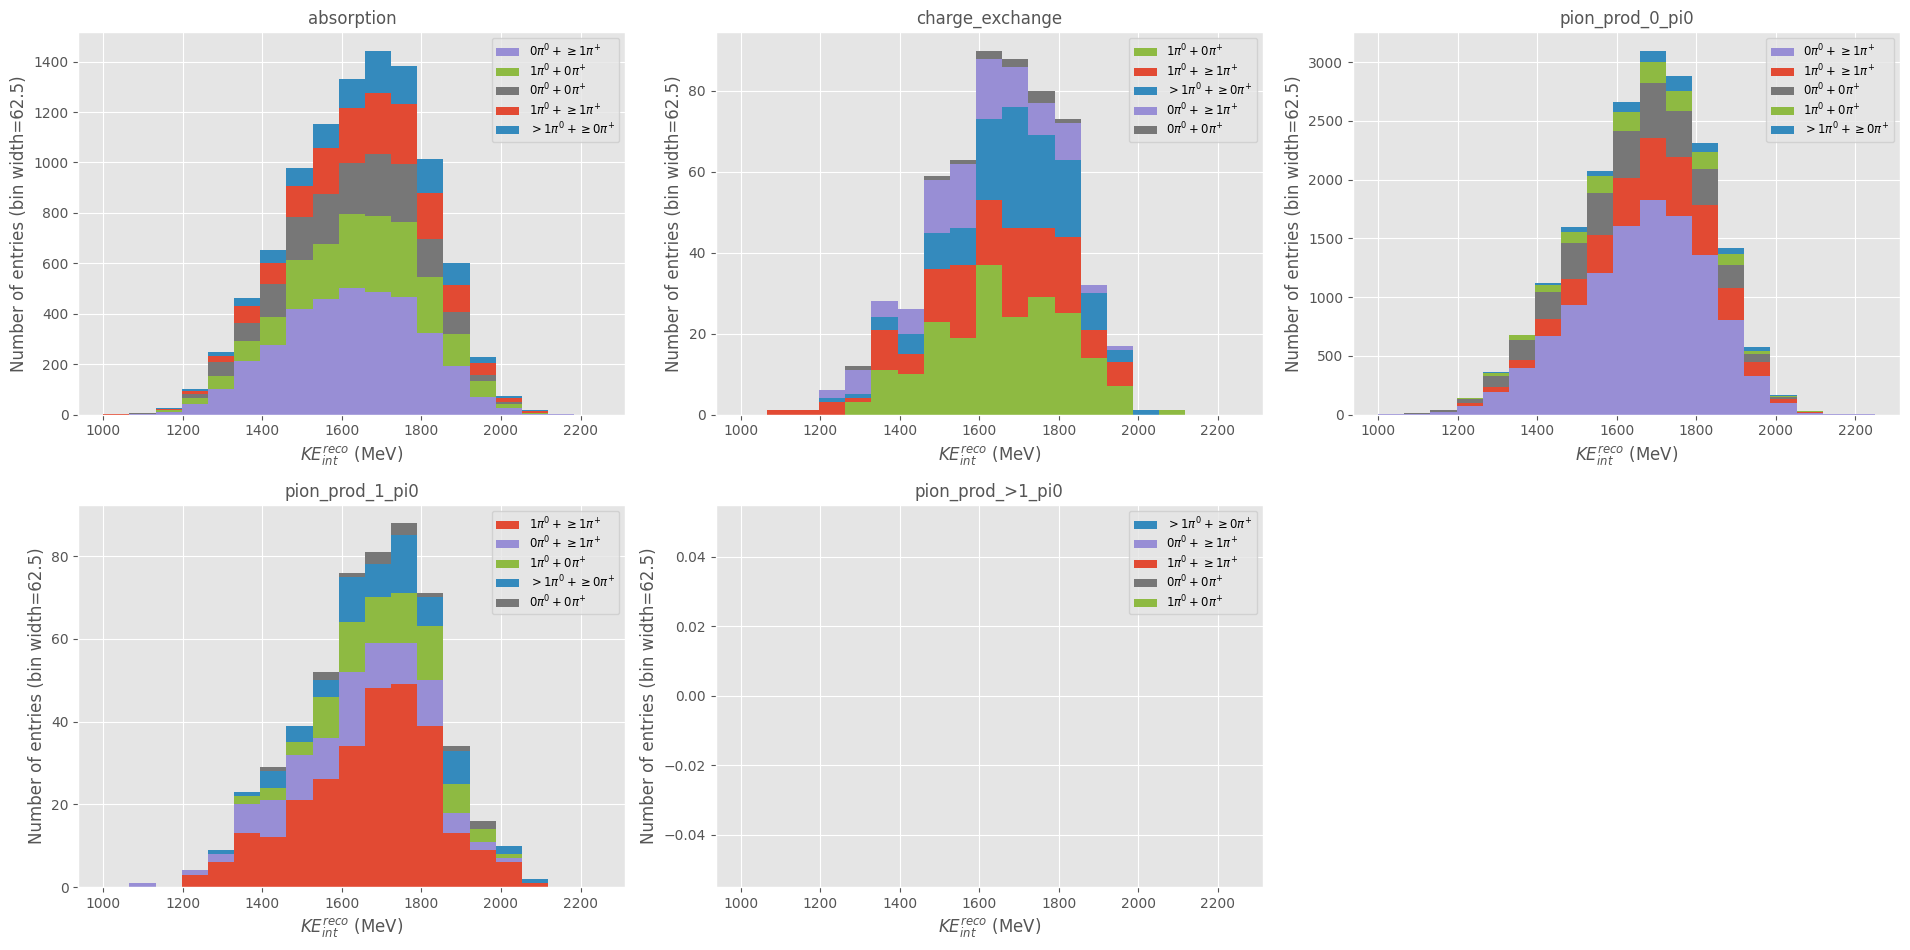

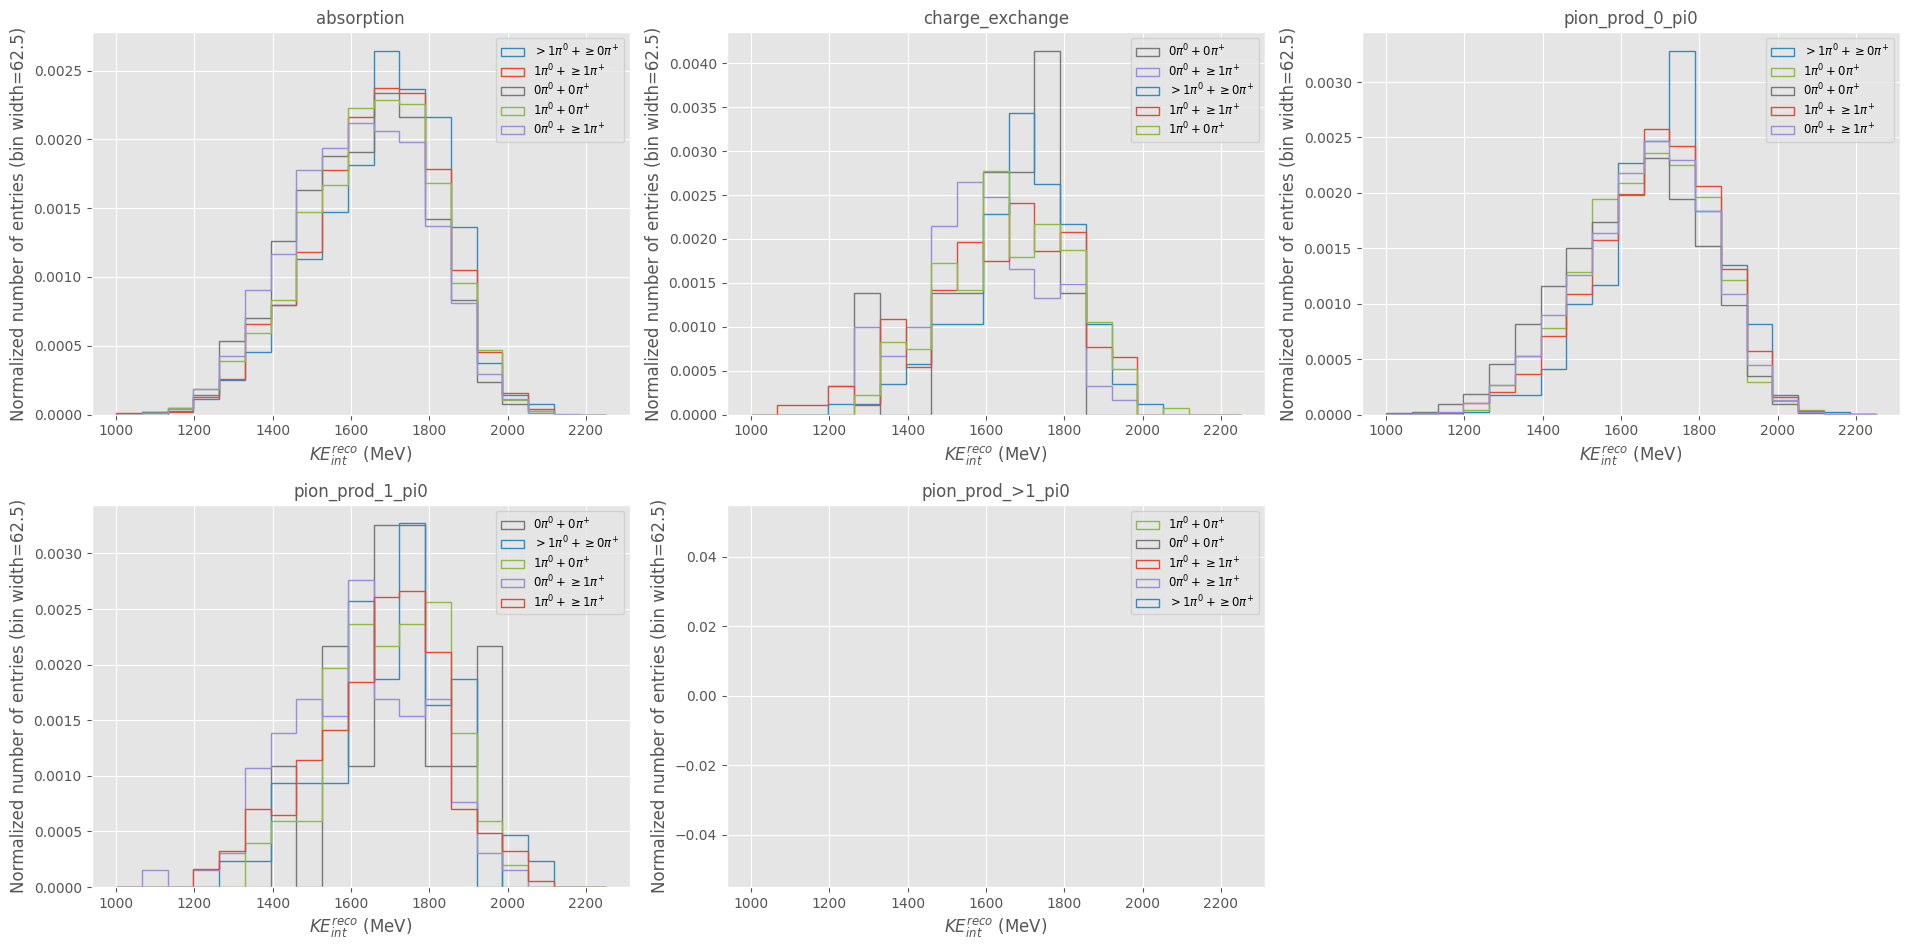

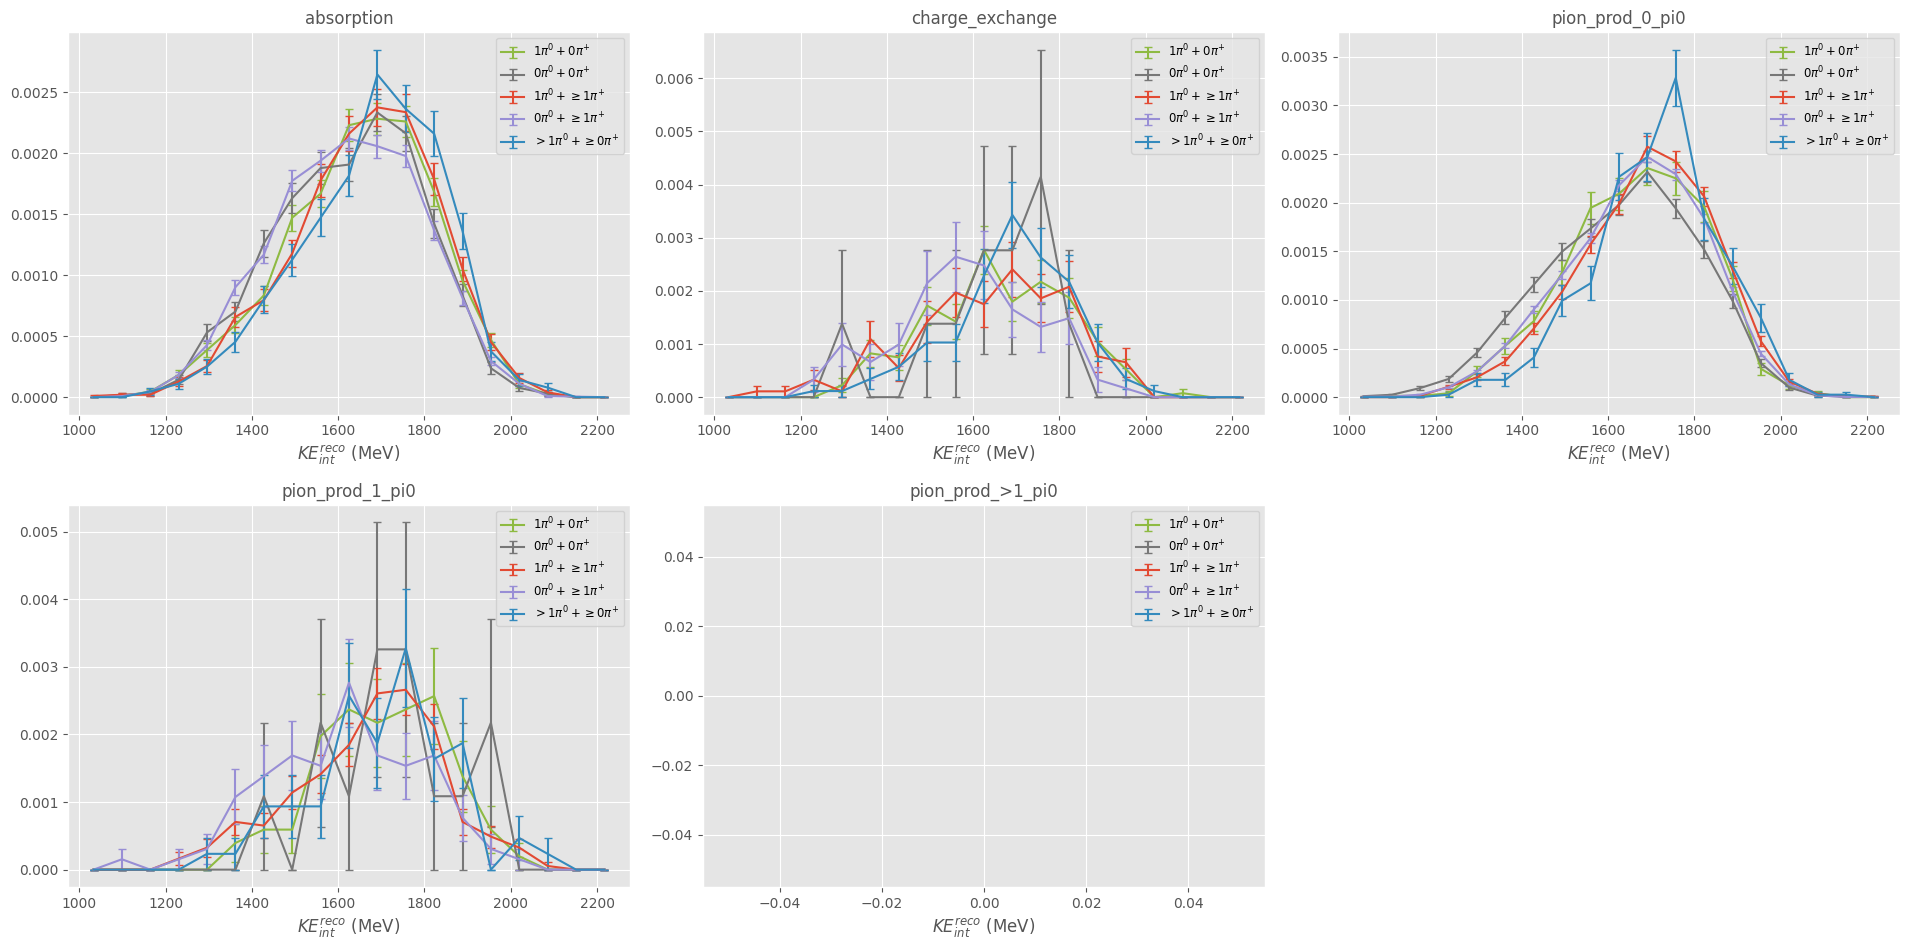

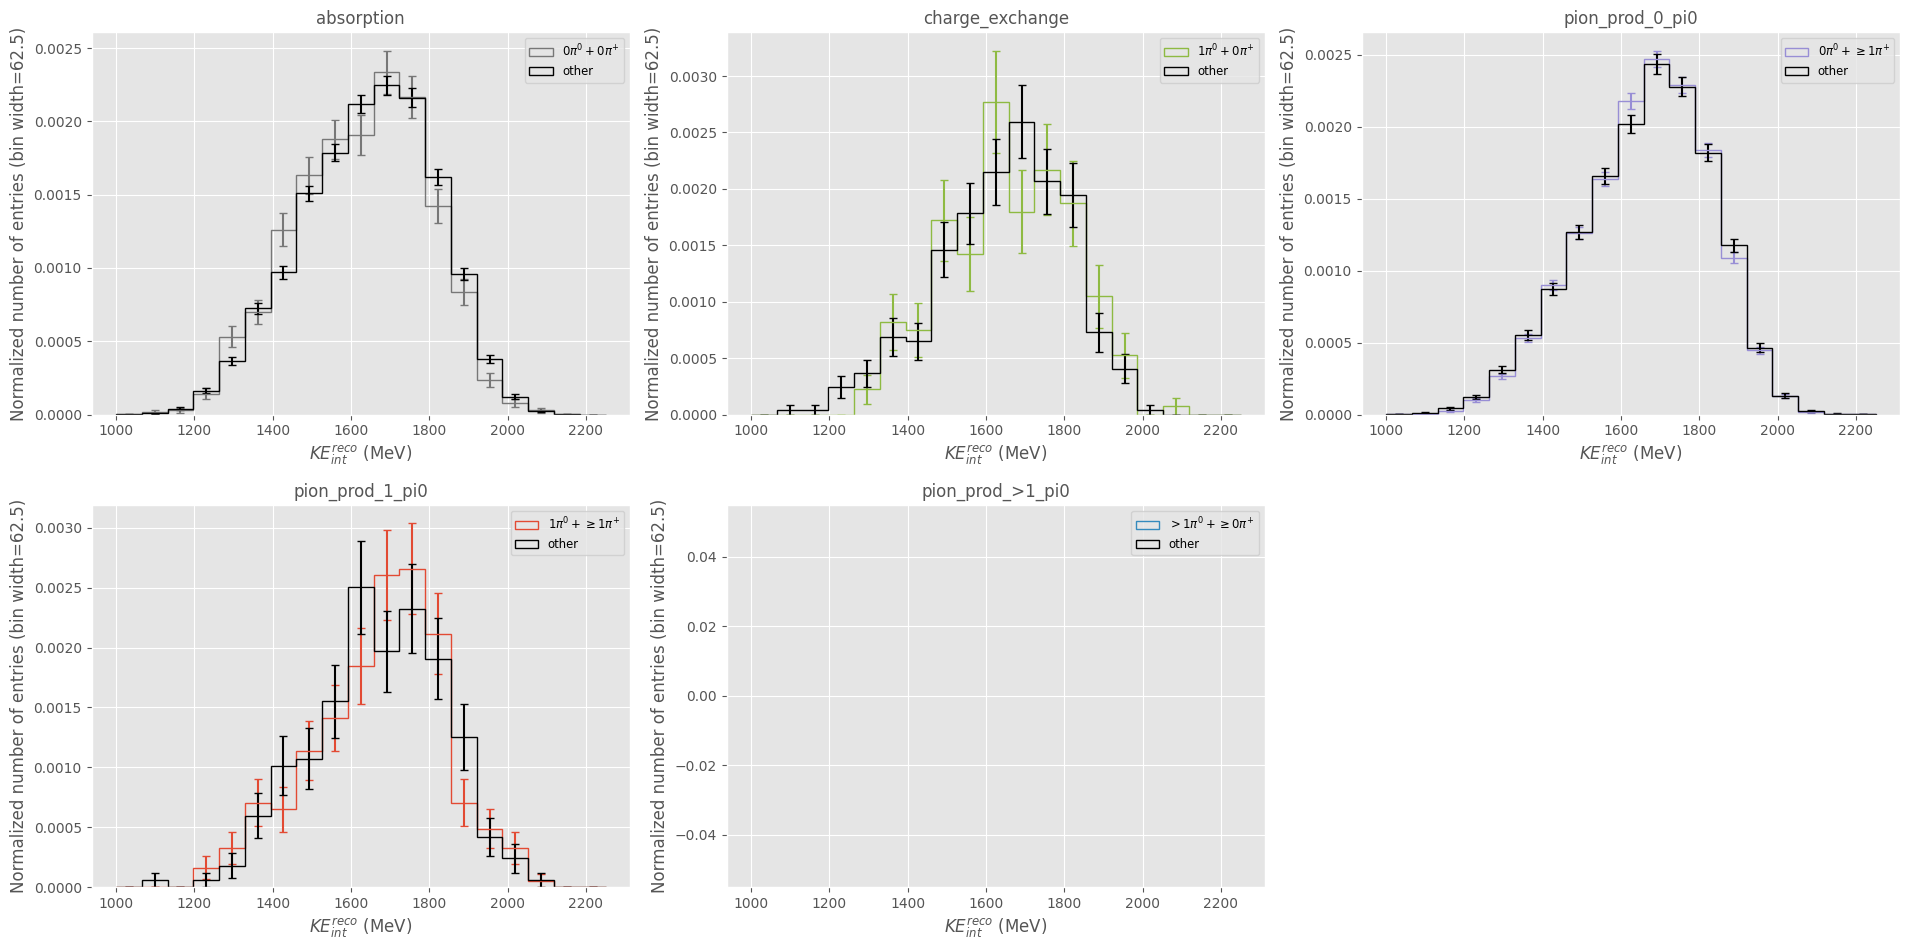

In [12]:
bins = np.linspace(1000, 2250, 20)
PlotInRegions(reco_KE_int, regions, bins, [1000, 2250], "$KE^{reco}_{int}$ (MeV)", stacked = True, norm = False)
PlotInRegions(reco_KE_int, regions, bins, [1000, 2250], "$KE^{reco}_{int}$ (MeV)", stacked = False, norm = True)
PlotTaggedNormalisedError(reco_KE_int, regions, bins, [1000, 2250], "$KE^{reco}_{int}$ (MeV)")
PlotSingleTaggedNormalisedError(reco_KE_int, regions, bins, [1000, 2250], "$KE^{reco}_{int}$ (MeV)")

/tmp/ipykernel_46486/1353157495.py:18: RuntimeWarning: invalid value encountered in divide
  density = counts / (sum(counts) * np.diff(edges))
/tmp/ipykernel_46486/1353157495.py:19: RuntimeWarning: invalid value encountered in divide
  density_err = np.sqrt(counts) / (sum(counts) * np.diff(edges))
/tmp/ipykernel_46486/1353157495.py:33: RuntimeWarning: invalid value encountered in divide
  density = [signal / (sum(signal) * np.diff(edges)), background / (sum(background) * np.diff(edges))]
/tmp/ipykernel_46486/1353157495.py:34: RuntimeWarning: invalid value encountered in divide
  density_err = [np.sqrt(signal) / (sum(signal) * np.diff(edges)), np.sqrt(background) / (sum(background) * np.diff(edges))]


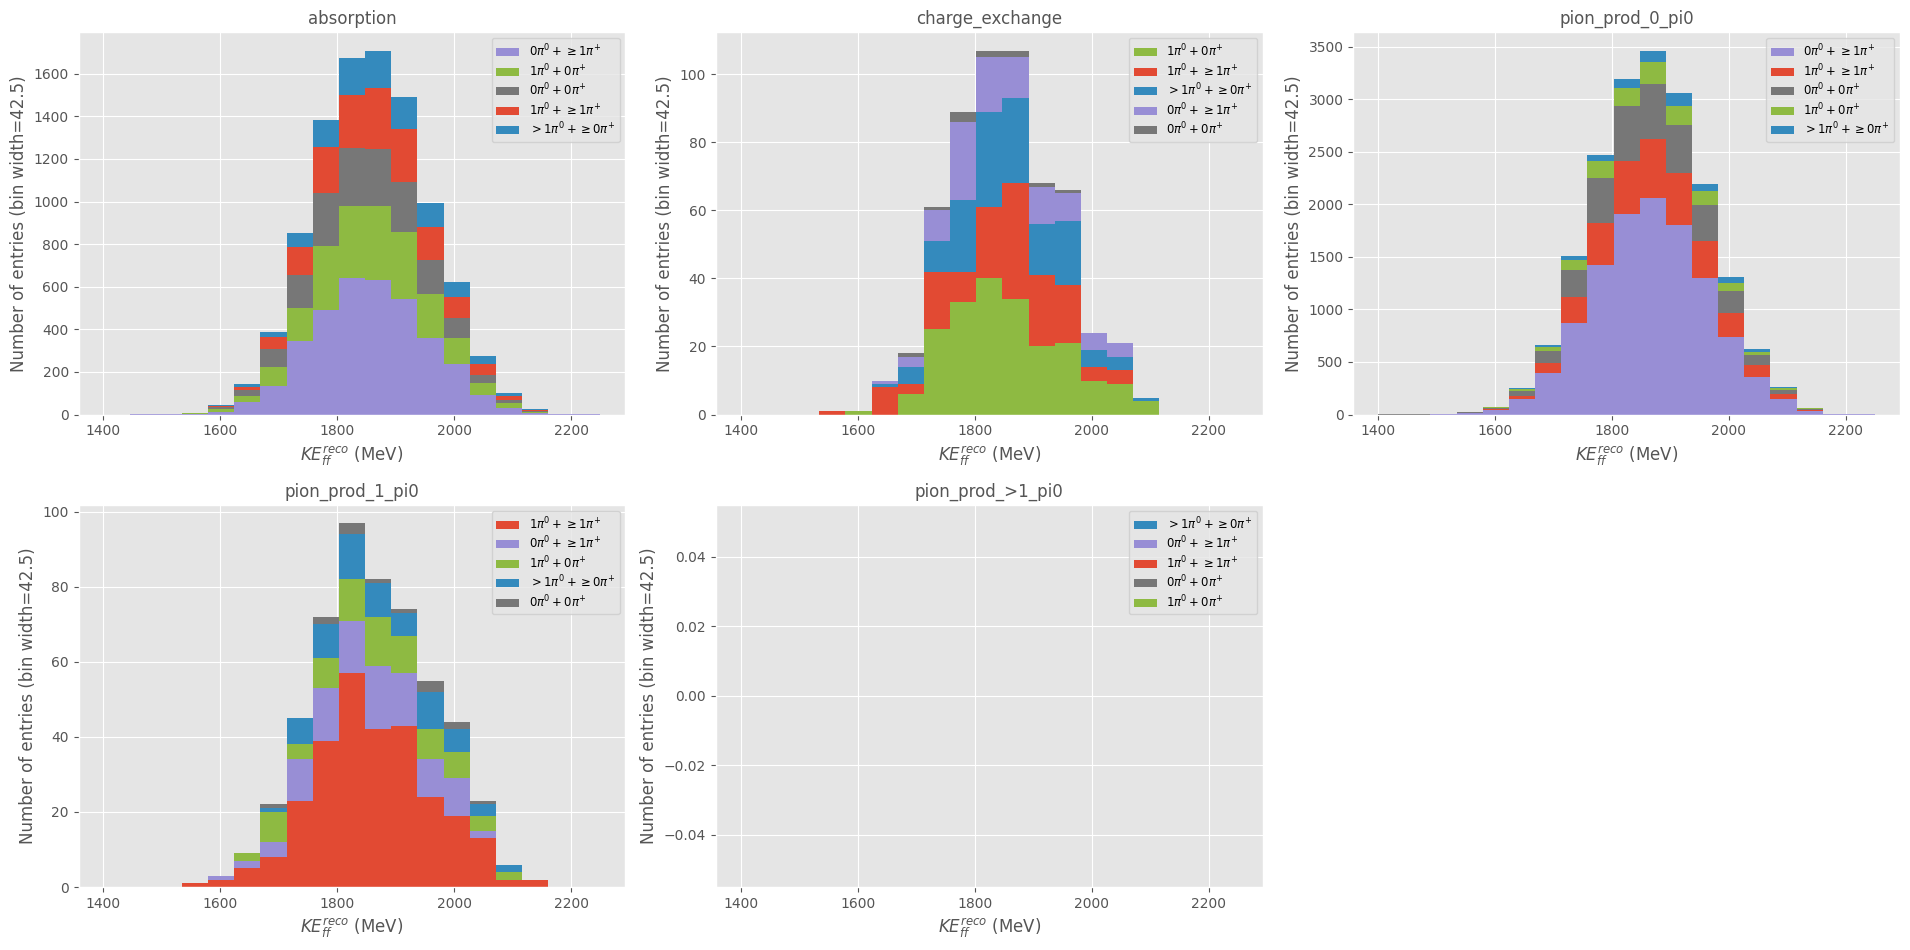

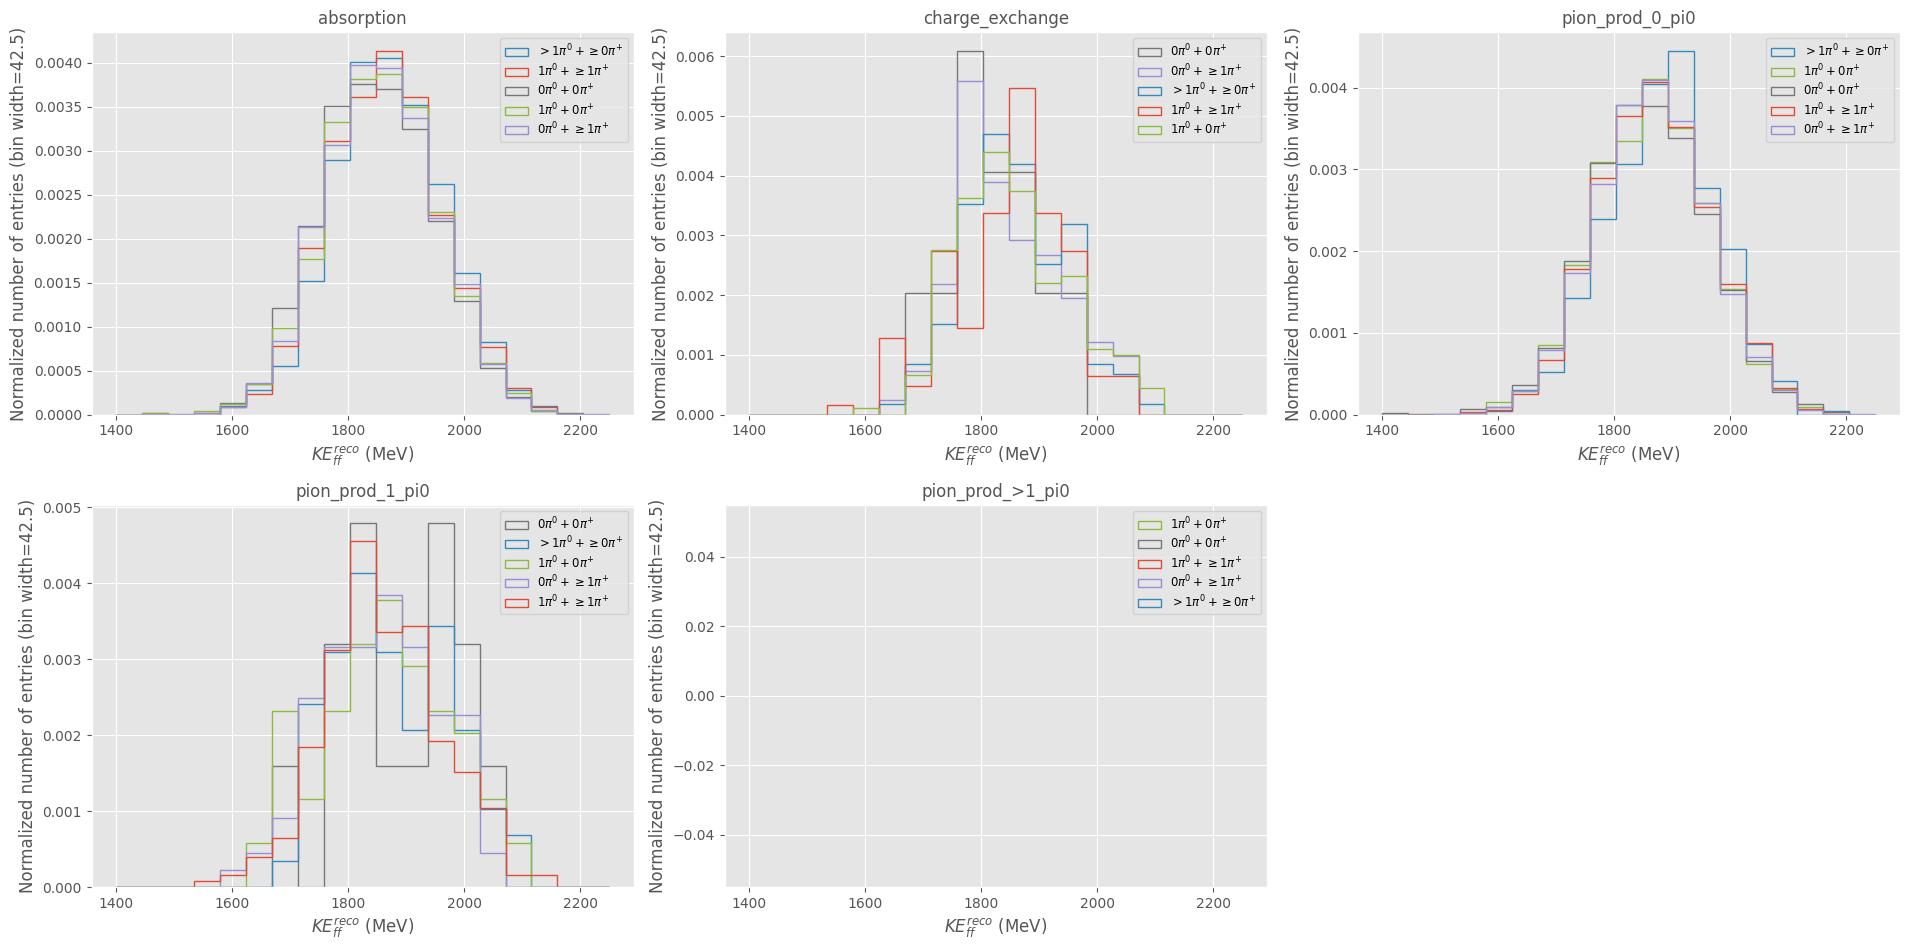

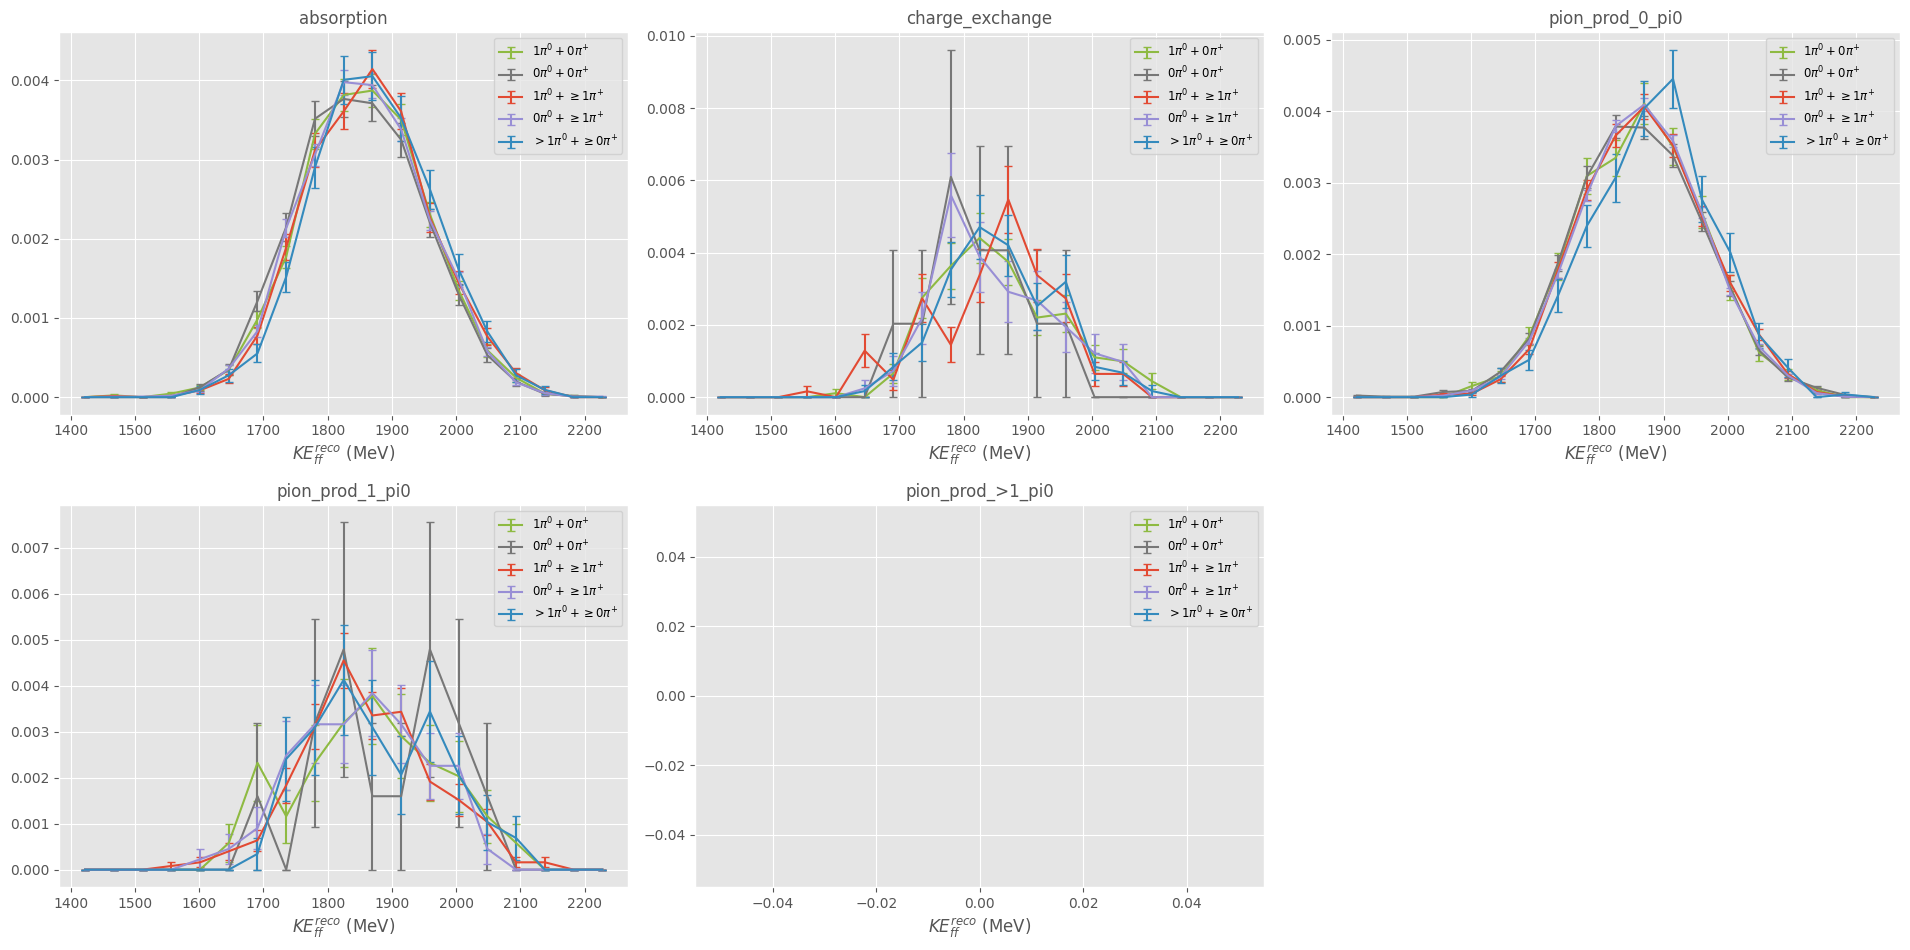

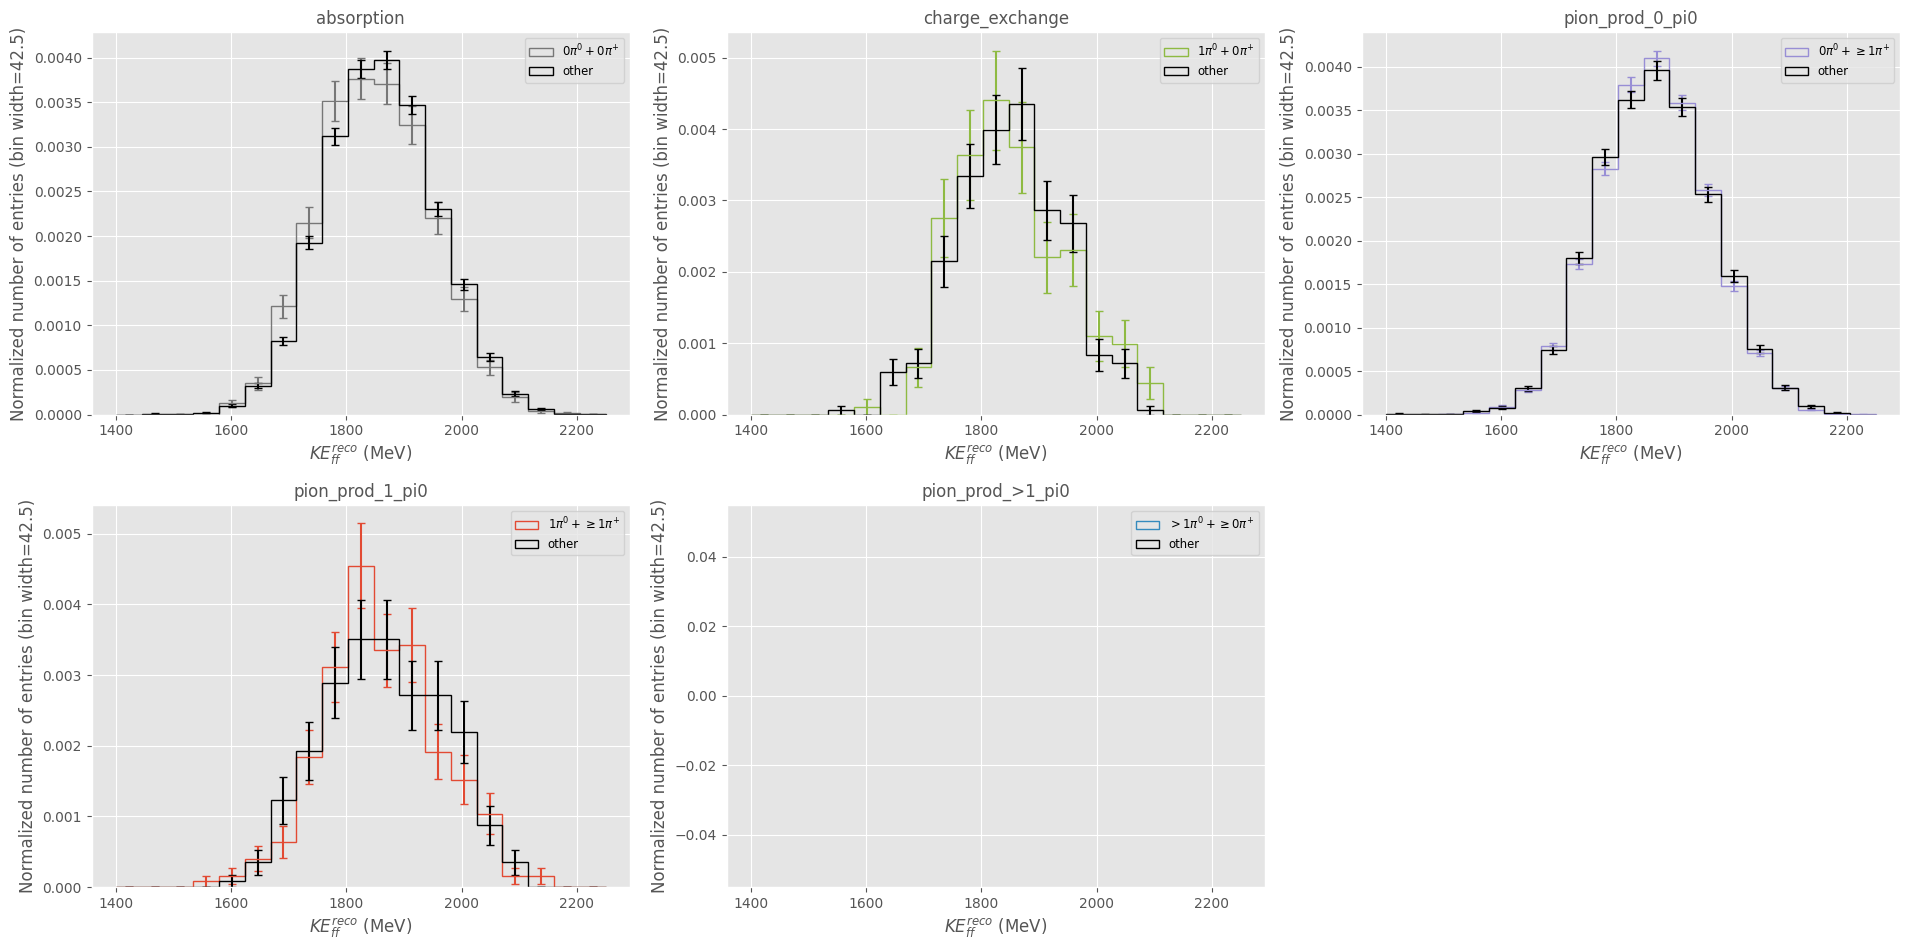

In [124]:
bins = np.linspace(1400, 2250, 20)
PlotInRegions(reco_KE_ff, regions, bins, [1400, 2250], "$KE^{reco}_{ff}$ (MeV)", stacked = True, norm = False)
PlotInRegions(reco_KE_ff, regions, bins, [1400, 2250], "$KE^{reco}_{ff}$ (MeV)", stacked = False, norm = True)
PlotTaggedNormalisedError(reco_KE_ff, regions, bins, [1400, 2250], "$KE^{reco}_{ff}$ (MeV)")
PlotSingleTaggedNormalisedError(reco_KE_ff, regions, bins, [1400, 2250], "$KE^{reco}_{ff}$ (MeV)")

charge_exchange

signal_yields: {'A': 3432, 'B': 4713, 'C': 5090, 'D': 15014}

observed_yields : {'A': 578, 'B': 9719, 'C': 535, 'D': 19184}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[5.13087500e+01 5.63136561e-01]
 [3.90641050e+02 1.36105650e+01]
 [1.79289594e+02 1.73750198e+01]
 [1.89718073e+00 2.54236510e-02]
 [0.00000000e+00 9.93346829e-01]]

[51.30874999  0.56313656]

[390.64104996  13.61056499]

[0.67584957 0.02354769]

absorption

signal_yields: {'A': 4713, 'B': 3432, 'C': 5090, 'D': 15014}

observed_yields : {'A': 9719, 'B': 578, 'C': 535, 'D': 19184}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[ 2.21523811e-01  6.13010476e-03]
 [ 3.89518879e+03  3.75467893e+01]
 [ 1.79289717e+02  2.77292449e+00]
 [ 1.65951557e+02  2.59853747e+00]
 [-3.70508047e-11  9.93368637e-01]]

[0.22152381 0.0061301 ]

[3895.18879369   37.54678926]

[0.40078082 0.00386324]

pion_prod_0_pi0

signal_yields: {'A': 15014, 'B': 3432, 'C': 4713, 'D': 5090}

observed_yields : {'A': 19184, 'B': 578, 'C': 9719, 'D': 535}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[1.81169853e+04 1.77034124e+02]
 [1.06760262e+03 1.17462969e+02]
 [1.84377571e-02 2.31587762e-03]
 [5.17937143e-01 6.74666224e-03]
 [0.00000000e+00 9.93346719e-01]]

[18116.98525423   177.03412432]

[1067.602623    117.46296943]

[0.05565068 0.00612297]

pion_prod_1_pi0

signal_yields: {'A': 5090, 'B': 3432, 'C': 4713, 'D': 15014}

observed_yields : {'A': 535, 'B': 578, 'C': 9719, 'D': 19184}

['mu_b', 'mu', 'tau_B', 'tau_C', 'systematic_uncertainty']

[[1.73164030e+02 2.12428324e+01]
 [3.61833806e+02 3.81637277e+01]
 [1.93047285e+00 2.51447337e-02]
 [5.41916230e+01 6.42906840e+00]
 [0.00000000e+00 9.93346719e-01]]

[173.16402961  21.24283243]

[361.83380581  38.16372768]

[0.67632487 0.07133407]

array([[1.73164030e+02, 2.12428324e+01],
       [3.61833806e+02, 3.81637277e+01],
       [1.93047285e+00, 2.51447337e-02],
       [5.41916230e+01, 6.42906840e+00],
       [0.00000000e+00, 9.93346719e-01]])

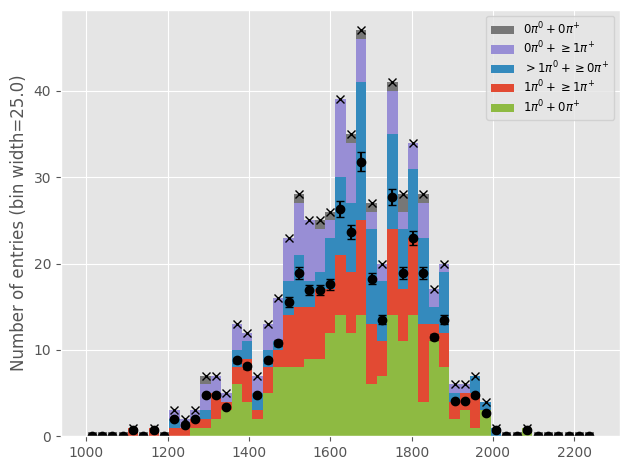

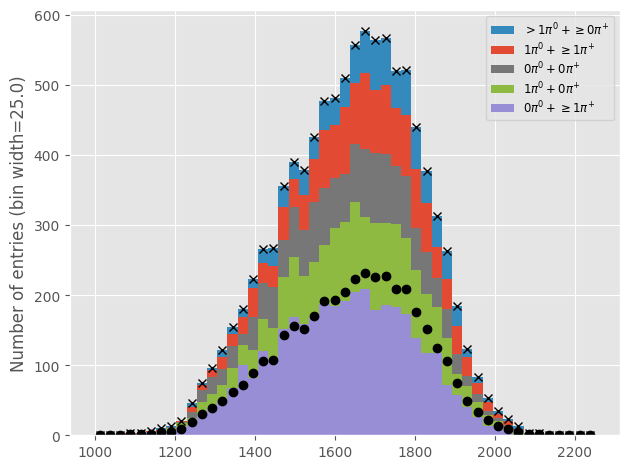

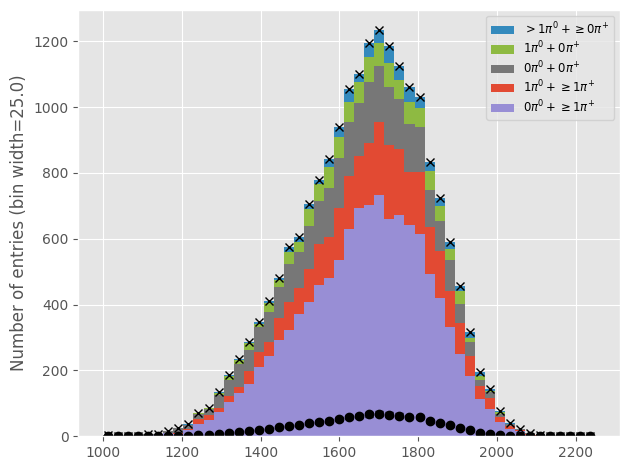

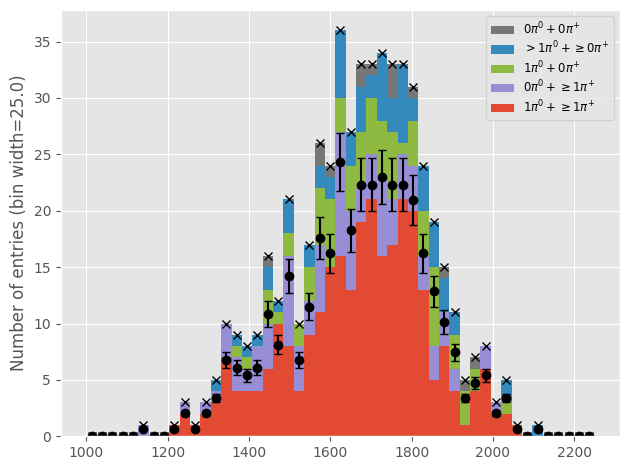

In [35]:
from abcd_pyhf import ABCD

yields = {r : sum(regions[r]) for r in regions if r != "pion_prod_>1_pi0"}

tags = cross_section.EventSelection.GenerateTrueFinalStateTags(mc)
signal_yields = {k : sum(tags[k].mask) for k in tags if k != "pion_prod_>1_pi0"}

def bkg_sub(signal_yields, observed_yields, signal):
    print(signal)
    sy = {"A" : signal_yields[signal]}
    oy = {"A" : yields[signal]}

    control_regions = list(signal_yields.keys())
    control_regions.remove(signal)
    for k, b in zip(["B", "C", "D"], control_regions):
        sy[k] = signal_yields[b]
        oy[k] = observed_yields[b]

    print(f"signal_yields: {sy}")
    print(f"observed_yields : {oy}")

    abcd = ABCD(oy, sy, 0)
    # abcd.model.spec
    print(abcd.model.config.par_names)
    result = abcd.fit()
    # result = abcd.bkg_only_fit()
    print(result)
    print(result[0])
    print(result[1])

    bins = np.linspace(1000, 2250, 50)
    scale_factor = result[1]/oy["A"]

    # scale_factor = result[0]/oy["A"]
    # scale_factor[0] = 1- scale_factor[0]
    print(scale_factor)

    tags = UpdateTags(cross_section.EventSelection.GenerateTrueFinalStateTags(mc), regions[signal])
    Plots.PlotTagged(reco_KE_int[regions[signal]], tags = tags, bins = bins, ncols = 1)

    counts, edges = np.histogram(np.array(reco_KE_int[regions[signal]]), bins = bins, range = [1000, 2250])
    centers = (edges[1:] + edges[:-1]) / 2

    Plots.Plot(centers, counts, linestyle = "", marker = "x", newFigure = False, color = "black")
    Plots.Plot(centers, counts*scale_factor[0], yerr = counts*scale_factor[1], linestyle = "", marker = "o", newFigure = False, color = "black")
    return result

bkg_sub(signal_yields, yields, "charge_exchange")
bkg_sub(signal_yields, yields, "absorption")
bkg_sub(signal_yields, yields, "pion_prod_0_pi0")
bkg_sub(signal_yields, yields, "pion_prod_1_pi0")


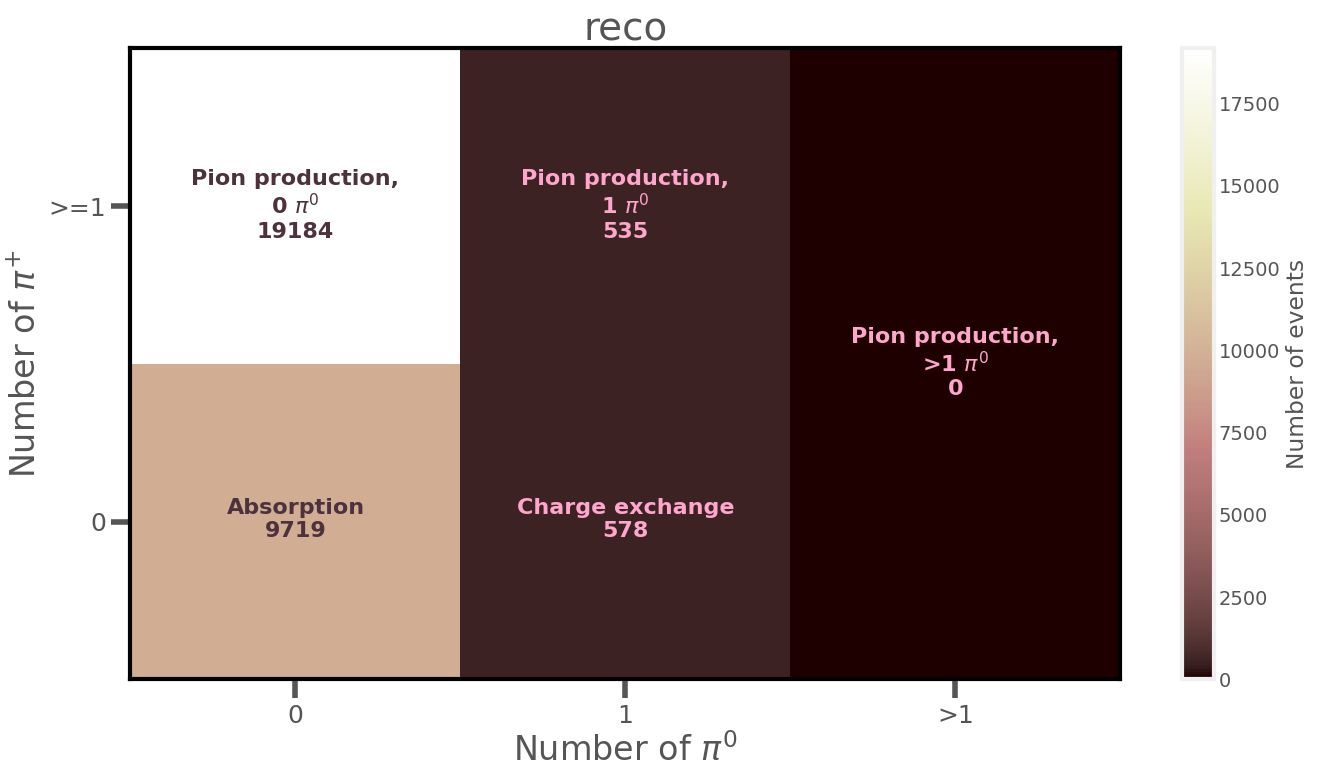

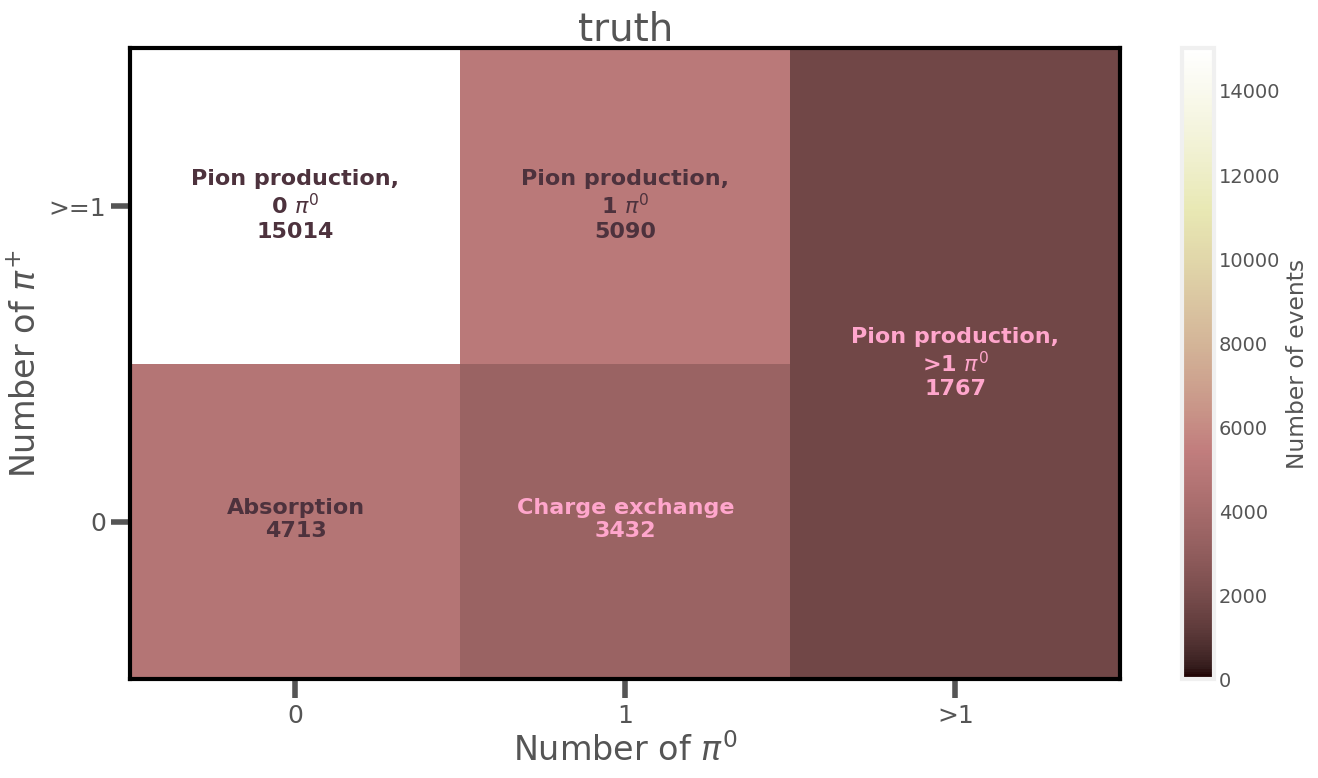

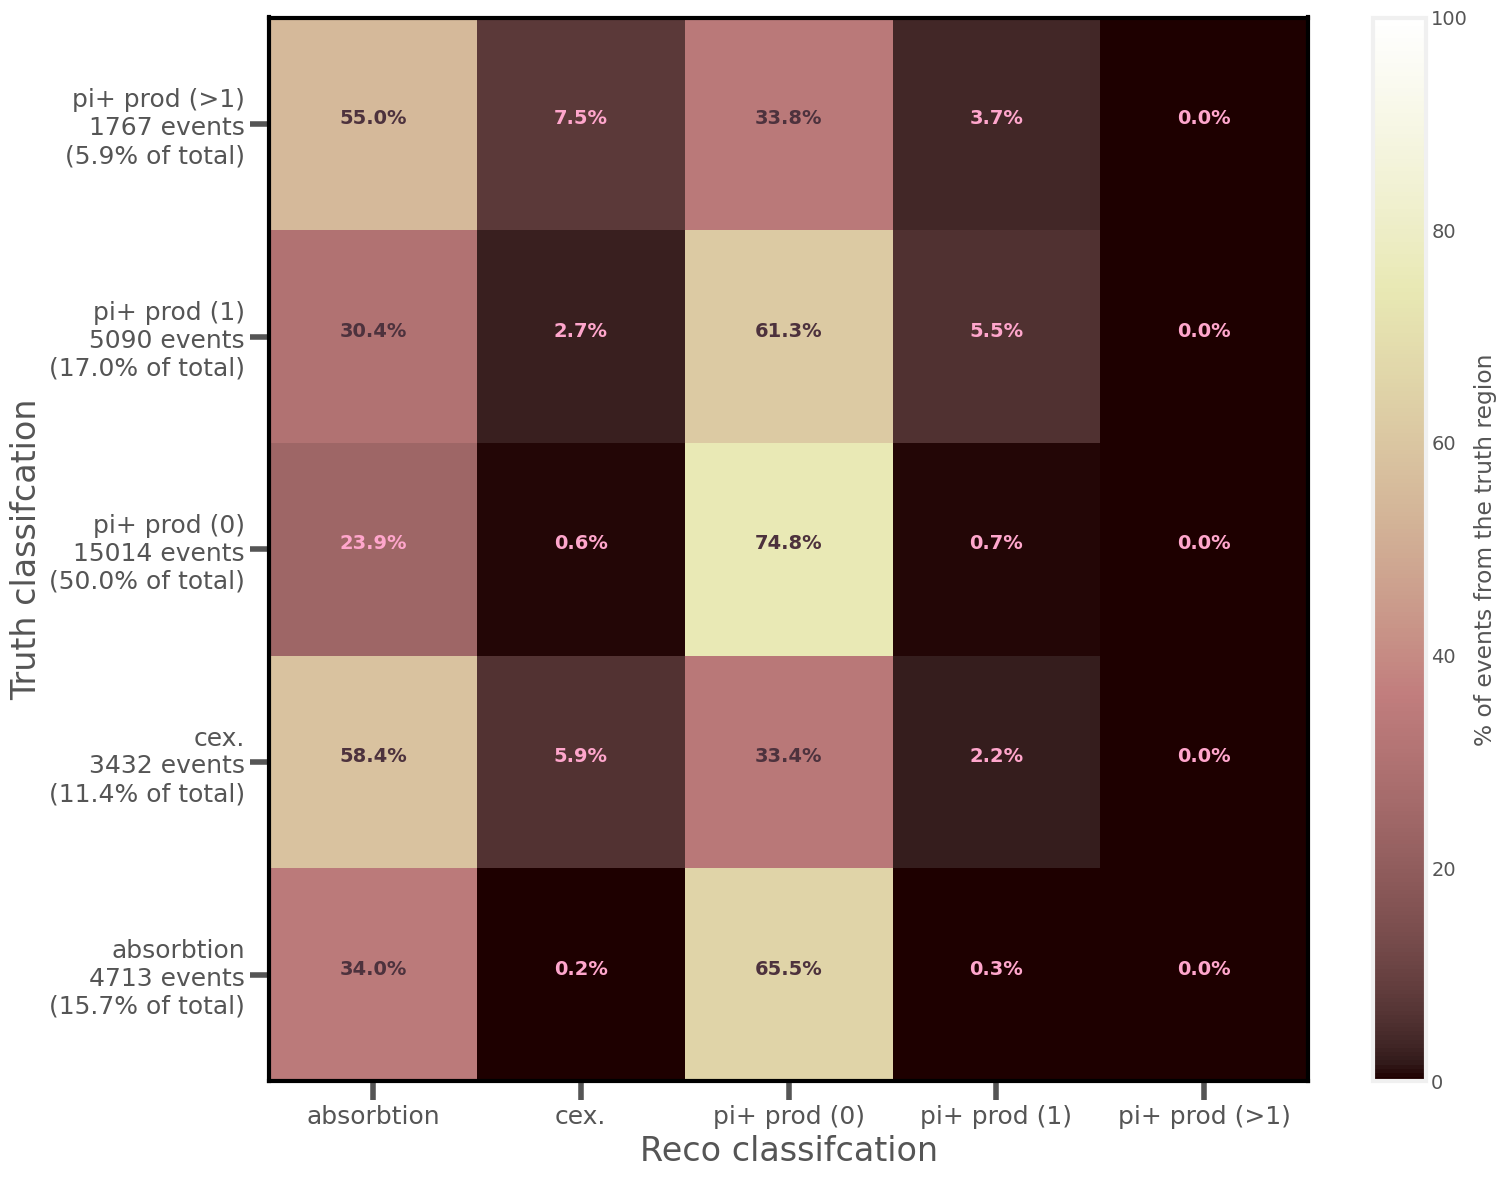

In [99]:
def PlotMatrix():
    reco_regions = cross_section.EventSelection.create_regions(ak.sum(pi0s, axis = -1), ak.sum(piplus, axis = -1)) # plot varaibles stacked in regions
    truth_regions = cross_section.EventSelection.create_regions(mc.trueParticles.nPi0, mc.trueParticles.nPiPlus)
    # truth_regions = {i : truth_regions[i] & beam_mask for i in truth_regions}
    # truth_regions = cross_section.EventSelection.create_regions(mc.trueParticles.nPi0, mc.trueParticles.nPiPlus)

    # reco_pi0_counts = cross_section.EventSelection.count_pi0_candidates(mc, exactly_two_photons = True, photon_mask = photons, correction = cross_section.EnergyCorrection.shower_energy_correction[args.correction], correction_params = cross_section.LoadConfiguration(args.correction_params))
    # reco_pi_plus_counts_mom_cut = cross_section.EventSelection.count_charged_pi_candidates(mc, energy_cut = None)
    # reco_regions = cross_section.EventSelection.create_regions(reco_pi0_counts, reco_pi_plus_counts_mom_cut)


    Plots.plot_region_data(reco_regions, title = "reco")
    Plots.plot_region_data(truth_regions, title = "truth")
    Plots.compare_truth_reco_regions(reco_regions, truth_regions)
    cross_section.SetPlotStyle(True, dpi = 100)

PlotMatrix()